In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io
from sklearn import preprocessing
%matplotlib inline

In [ ]:
abnb=pd.read_csv('airbnbmark1.csv')

C:\Users\koy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (27,61,62,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#ab = '/content/drive/MyDrive/bigdata_fintech_python-main/airbnbmark1.csv'
#abnb=pd.read_csv(ab)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (27,61,62,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
#데이터셋에 있는 모든 열 확인
for i in abnb.columns:
    print(i)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_ni

# 1. 데이터셋

In [6]:
df=abnb.reindex(columns=['last_scraped','host_response_time','host_response_rate','host_is_superhost',
                         'host_identity_verified','neighbourhood_cleansed',
                         'neighbourhood_group_cleansed','latitude','longitude','is_location_exact','property_type',
                        'room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','security_deposit',
                        'cleaning_fee','guests_included','extra_people','minimum_nights','number_of_reviews_ltm',
                        'last_review','review_scores_rating','instant_bookable','cancellation_policy',
                         'calculated_host_listings_count','price'])

In [7]:
df.head()

,last_scraped,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews_ltm,last_review,review_scores_rating,instant_bookable,cancellation_policy,calculated_host_listings_count,price
0,2020-02-12,within a day,50%,f,t,Midtown,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",$350.00,$95.00,1,$0.00,7,5,2019-11-04,94.0,f,strict_14_with_grace_period,2,$225.00
1,2020-02-13,within an hour,100%,f,t,Clinton Hill,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$500.00,NaN,1,$0.00,1,70,2020-02-08,90.0,f,moderate,1,$89.00
2,2020-02-12,NaN,NaN,f,f,Murray Hill,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$300.00,$125.00,2,$100.00,3,8,2019-10-13,90.0,f,moderate,1,$200.00
3,2020-02-12,NaN,NaN,f,f,Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,f,Apartment,Private room,2,NaN,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",$450.00,$0.00,1,$30.00,29,1,2019-12-02,90.0,f,strict_14_with_grace_period,1,$60.00
4,2020-02-13,within a few hours,90%,f,f,Hell's Kitchen,Manhattan,40.76489,-73.98493,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",NaN,$15.00,1,$12.00,2,49,2020-01-28,84.0,f,strict_14_with_grace_period,1,$79.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153254 entries, 0 to 153253
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   last_scraped                    153254 non-null  object 
 1   host_response_time              97815 non-null   object 
 2   host_response_rate              97815 non-null   object 
 3   host_is_superhost               153050 non-null  object 
 4   host_identity_verified          153050 non-null  object 
 5   neighbourhood_cleansed          153254 non-null  object 
 6   neighbourhood_group_cleansed    153254 non-null  object 
 7   latitude                        153254 non-null  float64
 8   longitude                       153254 non-null  float64
 9   is_location_exact               153254 non-null  object 
 10  property_type                   153254 non-null  object 
 11  room_type                       153254 non-null  object 
 12  accommodates    

In [9]:
df.describe()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,number_of_reviews_ltm,review_scores_rating,calculated_host_listings_count
count,153254.000000,153254.000000,153254.000000,153104.000000,153034.000000,152221.000000,153254.000000,153254.000000,153254.000000,119373.000000,153254.000000
mean,40.729086,-73.950828,2.860532,1.146626,1.180666,1.544432,1.518251,7.463838,9.240189,93.868454,7.609159
std,0.054865,0.047666,1.886842,0.426746,0.757619,1.132657,1.160639,21.631525,16.444702,8.794081,32.970765
min,40.499790,-74.244420,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,20.000000,1.000000
25%,40.689700,-73.983160,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,92.000000,1.000000
50%,40.723360,-73.955150,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,96.000000,1.000000
75%,40.763090,-73.934010,4.000000,1.000000,1.000000,2.000000,2.000000,5.000000,11.000000,100.000000,2.000000
max,40.914290,-73.708400,22.000000,15.500000,21.000000,40.000000,16.000000,1250.000000,730.000000,100.000000,302.000000


In [10]:
df.shape

(153254, 30)

# 2. 종속변수

종속변수: price

'$'와 ','를 제거한 후 object -> float64로 타입 변경

In [11]:
target=pd.DataFrame(df['price'])

In [12]:
target.describe()

,price
count,153254
unique,719
top,$100.00
freq,6358


In [13]:
#결측값 없음을 확인함
df['price'].isnull().sum(axis=0)

0

In [14]:
df['price']=df['price'].str.replace('$', '')
df['price']=df['price'].str.replace(',', '')
df['price']=df['price'].astype('float64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [15]:
df['price'].head()

0    225.0
1     89.0
2    200.0
3     60.0
4     79.0
Name: price, dtype: float64

# 3. 결측치 처리

In [16]:
#컬럼별 결측값 개수 구하기
df.isnull().sum()

last_scraped                          0
host_response_time                55439
host_response_rate                55439
host_is_superhost                   204
host_identity_verified              204
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0
longitude                             0
is_location_exact                     0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                           150
bedrooms                            220
beds                               1033
bed_type                              0
amenities                             0
security_deposit                  52623
cleaning_fee                      31923
guests_included                       0
extra_people                          0
minimum_nights                        0
number_of_reviews_ltm                 0
last_review                       30965


In [17]:
len(df)

153254

* host_response_time: 호스트가 응답하기까지 걸린 시간
* host_response_rate: 호스트 응답률

두 변수의 결측치는 호스트가 고객에 아예 응답하지 않았다고 판단한다.
가장 큰 패널티를 줄 수 있는 응답률 0%로 대체한다.

In [18]:
df['host_response_time'].unique

<bound method Series.unique of 0               within a day
1             within an hour
2                        NaN
3                        NaN
4         within a few hours
                 ...        
153249        within an hour
153250        within an hour
153251                   NaN
153252                   NaN
153253    a few days or more
Name: host_response_time, Length: 153254, dtype: object>

In [19]:
df['host_response_rate'].unique()

array(['50%', '100%', nan, '90%', '60%', '67%', '0%', '92%', '96%', '71%',
       '43%', '75%', '33%', '93%', '94%', '80%', '25%', '95%', '70%',
       '86%', '30%', '83%', '40%', '89%', '57%', '14%', '88%', '56%',
       '78%', '20%', '42%', '82%', '63%', '91%', '69%', '10%', '77%',
       '17%', '85%', '99%', '79%', '98%', '64%', '38%', '11%', '87%',
       '29%', '97%', '65%', '13%', '76%', '73%', '84%', '44%', '46%',
       '81%', '35%', '68%', '47%', '58%', '53%', '59%', '72%', '74%',
       '6%', '22%', '23%', '61%', '52%', '66%', '62%', '54%', '27%',
       '36%', '55%', '37%', '31%', '45%', '32%', '5%', '48%', '21%',
       '39%', '18%', '26%', '41%', '51%'], dtype=object)

In [20]:
df['host_response_time'].fillna('a few days or more', inplace=True)
df['host_response_rate'].fillna('0%', inplace=True)

In [21]:
df['host_response_rate']=df['host_response_rate'].str.replace('%', '')
df['host_response_rate']=df['host_response_rate'].str.replace(',', '')
df['host_response_rate']=df['host_response_rate'].astype('float64')

* host_is_superhost: 204
* host_identity_verified: 204

두 변수는 결측치를 f로 줬다. 

In [22]:
df['host_is_superhost'].unique

<bound method Series.unique of 0         f
1         f
2         f
3         f
4         f
         ..
153249    f
153250    f
153251    f
153252    f
153253    f
Name: host_is_superhost, Length: 153254, dtype: object>

In [23]:
df['host_identity_verified'].unique()

array(['t', 'f', nan], dtype=object)

In [24]:
df['host_is_superhost'].fillna('f', inplace=True)
df['host_identity_verified'].fillna('f', inplace=True)

* bathroom, bedroom, bed : 최빈값 대체
* value_counts().idxmax() : 최빈값

In [25]:
df['bathrooms'].fillna(df['bathrooms'].value_counts().idxmax(), inplace=True)

rep_med = ['bedrooms', 'beds']
for i in rep_med:
    df[i].fillna(df[i].value_counts().idxmax(), inplace=True)

In [26]:
beds_bedroom_dropna=df.dropna(subset=['bedrooms'])

* review_scores_rating: 평균 대체

In [27]:
df['review_scores_rating'].fillna(df['review_scores_rating'].mean(), inplace=True)

In [28]:
# 중간 확인
df.isnull().sum()

last_scraped                          0
host_response_time                    0
host_response_rate                    0
host_is_superhost                     0
host_identity_verified                0
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0
longitude                             0
is_location_exact                     0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                             0
bedrooms                              0
beds                                  0
bed_type                              0
amenities                             0
security_deposit                  52623
cleaning_fee                      31923
guests_included                       0
extra_people                          0
minimum_nights                        0
number_of_reviews_ltm                 0
last_review                       30965


* 파생변수 : last_scraped - last review = review updated

In [29]:
# 날짜형 변수로 바꾸기
lst = ['last_review','last_scraped']
for i in lst:
    df[i]=pd.to_datetime(df[i], format = '%Y-%m-%d')

In [30]:
# last_scraped - last review = review updated
# 제일 최근에 리뷰를 스크랩한 날짜 - 제일 마지막 리뷰 하면 리뷰 업데이트
# 가장 최근 리뷰가 오래될 수록 방문하고 싶지 않다. 
# 결측치는 max로 대체해 penalty 부과

temp = (df[df['last_review'].notnull()]['last_scraped']-df[df['last_review'].notnull()]['last_review']).astype('str').str.split('days').str.get(0).astype('int')
max_temp = temp.max()

#max_temp = 4191
df['review_updated'] = (df['last_scraped']-df['last_review']).astype('str').str.split('days').str.get(0)
df['review_updated'] = df['review_updated'].str.replace('NaT',str(max_temp)).astype('float')

In [31]:
df.drop(['last_review','last_scraped'], axis=1, inplace=True)

* security_deposit: 보증금
* cleaning_fee: 청소비

결측치는 각각 값이 없다고 간주하고 0으로 대체

In [32]:
df['cleaning_fee']=df['cleaning_fee'].str.replace('$', '')
df['cleaning_fee']=df['cleaning_fee'].str.replace(',', '')
df['cleaning_fee']=df['cleaning_fee'].astype('float64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [33]:
df['security_deposit']=df['security_deposit'].str.replace('$', '')
df['security_deposit']=df['security_deposit'].str.replace(',', '')
df['security_deposit']=df['security_deposit'].astype('float64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [34]:
df['cleaning_fee'] = df['cleaning_fee'].fillna(0)
df['security_deposit'] = df['security_deposit'].fillna(0)

In [35]:
#결측치 처리 완료
df.isnull().sum()

host_response_time                0
host_response_rate                0
host_is_superhost                 0
host_identity_verified            0
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
latitude                          0
longitude                         0
is_location_exact                 0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
bed_type                          0
amenities                         0
security_deposit                  0
cleaning_fee                      0
guests_included                   0
extra_people                      0
minimum_nights                    0
number_of_reviews_ltm             0
review_scores_rating              0
instant_bookable                  0
cancellation_policy               0
calculated_host_listings_count    0
price                       

## 4. 범주형 변수

host_response_time, host_is_superhost, host_identity_verified, street, neighbourhood_cleansed, neighbourhood_group_cleansed, is_location_exact, property_type, room_type, bed_type, amenities, instant_bookable, cancellation_policy

**neighbourhood_group_cleansed**

In [36]:
df['neighbourhood_group_cleansed'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [37]:
(df['price'].groupby(df['neighbourhood_group_cleansed'])).mean()

neighbourhood_group_cleansed
Bronx             89.085463
Brooklyn         125.237216
Manhattan        220.031008
Queens            98.458819
Staten Island    104.490846
Name: price, dtype: float64

In [38]:
df.groupby(['room_type', 'neighbourhood_group_cleansed']).mean()['price']

room_type        neighbourhood_group_cleansed
Entire home/apt  Bronx                           131.493633
                 Brooklyn                        178.288041
                 Manhattan                       245.418955
                 Queens                          146.651687
                 Staten Island                   148.072438
Hotel room       Brooklyn                        180.461538
                 Manhattan                       313.134000
                 Queens                          144.297297
Private room     Bronx                            64.657308
                 Brooklyn                         75.996226
                 Manhattan                       181.170633
                 Queens                           69.436682
                 Staten Island                    62.886926
Shared room      Bronx                            78.926554
                 Brooklyn                         72.382047
                 Manhattan                        96.7

**property_type**

In [39]:
df['property_type'].unique()

array(['Apartment', 'Guest suite', 'Townhouse', 'Loft',
       'Bed and breakfast', 'House', 'Condominium', 'Guesthouse',
       'Boutique hotel', 'Tiny house', 'Cabin', 'Hostel', 'Other', 'Boat',
       'Serviced apartment', 'Earth house', 'Bungalow', 'Cottage',
       'Aparthotel', 'Villa', 'Cave', 'Hotel', 'Houseboat', 'Resort',
       'Castle', 'Timeshare', 'Tent', 'In-law', 'Barn', 'Camper/RV',
       'Bus', 'Dome house', 'Farm stay', 'Casa particular (Cuba)', 'Dorm',
       'Island', 'Yurt', 'Lighthouse', 'Train', 'Treehouse'], dtype=object)

### property_type 6가지 카테고리로 나눠준다. 
special_experience 부분에서 가격 차이가 심하다. 

1. Housing: 'Apartment', 'House', 'Serviced apartment'(고급 아파트), 'Townhouse', 'Villa'

2. Basic_privacy_high: ''Aparthotel', 'Bed and breakfast', 'Boutique hotel', 'Casa particular (Cuba)'(민박), ''Condominium', 'Guest suite', 'Hotel', ''Resort', 

3. Basic_privacy_low: 'Dorm', 'Hostel', 'Guesthouse', 'Timeshare'(공동사용)

4. Special_experience_low: 'Barn', 'Boat', 'Bus', 'Camper/RV'(캠핑카), 'Cave', , ,'Cottage', 'Lighthouse'(등대), 'Tent', 'Tiny house', 'Train', 'Treehouse', 'Yurt'(몽골 텐트), 'Farm stay', 'Earth house'(땅속 집), 'Loft'(이층집 다락방)

5. Special_experience_high: 'Cabin'(배선실), 'Castle', 'Dome house', 'Island', 'Bungalow'(대저택, 수정), 'Houseboat'(선상가옥)

6. 'other' : 'In-law','Other'

> housing, special high, low로 나눠주기

In [40]:
types= {'Housing' : ['Apartment', 'House', 'Serviced apartment', 'Townhouse', 'Villa'],
        'Basic_privacy_high' : ['Aparthotel', 'Bed and breakfast', 'Boutique hotel', 'Casa particular (Cuba)', 'Condominium', 'Guest suite', 'Hotel', 'Resort'],
        'Basic_privacy_low' : ['Dorm', 'Hostel', 'Guesthouse', 'Timeshare'],
        'Special_experience_low' : ['Barn', 'Bus', 'Camper/RV', 'Cave','Cottage', 'Lighthouse', 'Tent', 'Train', 'Treehouse', 'Yurt', 'Farm stay', 'Earth house'],
        'Special_experience_high' : ['Cabin', 'Castle', 'Dome house','Island','Bungalow', 'Houseboat', 'Tiny house', 'Boat', 'Loft'],
        'other' : ['In-law','Other']}

for k in types.keys() :
    for v in types[k] :
        df['property_type'] = np.where(df['property_type']==v, k, df['property_type'])

In [41]:
df['property_type'].value_counts()

Housing                    139144
Basic_privacy_high           8855
Special_experience_high      4409
Basic_privacy_low             393
other                         289
Special_experience_low        164
Name: property_type, dtype: int64

In [42]:
(df['price'].groupby(df['property_type'])).mean()

property_type
Basic_privacy_high         402.108187
Basic_privacy_low          107.697201
Housing                    145.355006
Special_experience_high    226.523928
Special_experience_low     131.670732
other                      280.896194
Name: price, dtype: float64

**room_type**

In [43]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [44]:
(df['price'].groupby(df['room_type'])).mean()

room_type
Entire home/apt    209.070020
Hotel room         287.498336
Private room       111.310170
Shared room         84.331456
Name: price, dtype: float64

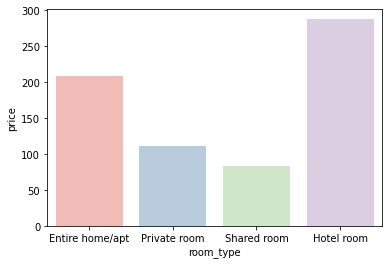

In [45]:
sns.barplot(x='room_type', y='price', data=df, ci=None, palette='Pastel1')

**bed_type**

In [46]:
df['bed_type'].unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Airbed', 'Couch'],
      dtype=object)

In [47]:
(df['price'].groupby(df['bed_type'])).mean()

bed_type
Airbed           126.451064
Couch            171.358586
Futon             94.076355
Pull-out Sofa    116.365607
Real Bed         163.351763
Name: price, dtype: float64

In [48]:
df.groupby(['room_type', 'bed_type']).mean()['price']

room_type        bed_type     
Entire home/apt  Airbed           215.914729
                 Couch            483.196078
                 Futon            134.192913
                 Pull-out Sofa    146.622302
                 Real Bed         209.343533
Hotel room       Real Bed         287.498336
Private room     Airbed            96.322581
                 Couch             75.111111
                 Futon             73.069620
                 Pull-out Sofa    103.724382
                 Real Bed         111.694511
Shared room      Airbed            75.887097
                 Couch             57.901961
                 Futon             91.309524
                 Pull-out Sofa     79.465649
                 Real Bed          85.307761
Name: price, dtype: float64

**amenities**

In [49]:
df['amenities'].unique()

array(['{TV,Wifi,"Air conditioning",Kitchen,"Paid parking off premises","Free street parking",Heating,"Family/kid friendly","Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,"Lock on bedroom door","Hair dryer",Iron,"Laptop friendly workspace","Self check-in",Keypad,"Private living room",Bathtub,"Hot water","Bed linens","Extra pillows and blankets","Ethernet connection","Coffee maker",Refrigerator,"Dishes and silverware","Cooking basics",Oven,Stove,"Luggage dropoff allowed","Long term stays allowed","Cleaning before checkout"}',
       '{TV,"Cable TV",Internet,Wifi,"Air conditioning",Kitchen,"Pets allowed","Free street parking",Heating,"Family/kid friendly","Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo,"Lock on bedroom door","24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Self check-in",Lockbox,Bathtub,"High chair","Stair gates","Children’s books and toys","Pack ’n Play/travel crib","Hot water",Micro

In [50]:
amenities_n = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12', 'a13', 'a14']

In [51]:
for i in amenities_n:
        df[i] = 0

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153254 entries, 0 to 153253
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_response_time              153254 non-null  object 
 1   host_response_rate              153254 non-null  float64
 2   host_is_superhost               153254 non-null  object 
 3   host_identity_verified          153254 non-null  object 
 4   neighbourhood_cleansed          153254 non-null  object 
 5   neighbourhood_group_cleansed    153254 non-null  object 
 6   latitude                        153254 non-null  float64
 7   longitude                       153254 non-null  float64
 8   is_location_exact               153254 non-null  object 
 9   property_type                   153254 non-null  object 
 10  room_type                       153254 non-null  object 
 11  accommodates                    153254 non-null  int64  
 12  bathrooms       

In [53]:
amenities = {'a1' : ['24-hour check-in'], # 체크인
             'a2' : ['Breakfast'], # 조식
             'a3' : ['Garden or backyard', 'Gym', 'Pool', 'Patio or balcony'], # 부대시설
             'a4' : ['Kitchen', 'Cooking basics', 'Full kitchen', 'Kitchenette'], # 주방
             'a5' : ['Hot tub', 'Bathtub with bath chair', 'Bathtub'], # 욕실관련
             'a6' : ['Wifi', 'Internet', 'Ethernet connection', 'Pocket wifi'], # 인터넷
             'a7' : ['TV', 'Air conditioning', 'Heating'], # 가전제품
             'a8' : ['Beachfront', 'Lake access', 'Waterfront' ], # 전망
             'a9' : ['Private living room'],
             'a10' : ['Private entrance'],
             'a11' : ['Washer', 'Dryer', 'Washer/Dryer', 'Washer / Dryer'],
             'a12' : ['Lock on bedroom door'],
             'a13' : ['Private bathroom'],
             'a14' : ['Children', 'Baby']}

for k in amenities.keys():
    for v in amenities[k]:
        for i in range (len(df['amenities'])):
            if v in df['amenities'][i]:
                df[k][i] = 1
            else:
                pass            

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [54]:
for i in amenities_n:
    print('')
    print((df['price'].groupby(df[i])).mean())
    print('')
    print(df.groupby(['room_type', i]).mean()['price'])
    print('')
    print('')


a1
0    160.551977
1    185.120818
Name: price, dtype: float64

room_type        a1
Entire home/apt  0     207.496339
                 1     222.202496
Hotel room       0     250.361237
                 1     683.747573
Private room     0     111.630428
                 1     106.656229
Shared room      0      84.468917
                 1      81.522989
Name: price, dtype: float64



a2
0    160.695622
1    186.474438
Name: price, dtype: float64

room_type        a2
Entire home/apt  0     208.066931
                 1     222.960718
Hotel room       0     279.909709
                 1     332.941860
Private room     0     107.193374
                 1     155.621396
Shared room      0      85.207295
                 1      76.058824
Name: price, dtype: float64



a3
0    145.704428
1    226.127594
Name: price, dtype: float64

room_type        a3
Entire home/apt  0     195.689681
                 1     249.122856
Hotel room       0     318.020566
                 1     272.894219
Priva

a1


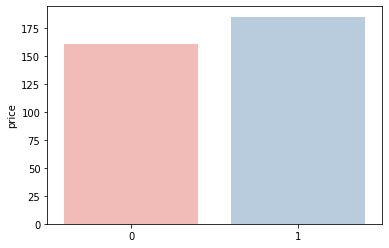

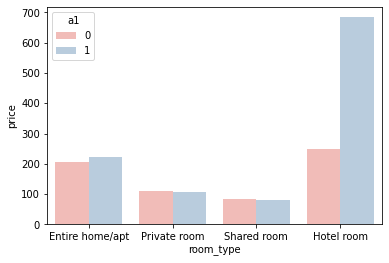


a2


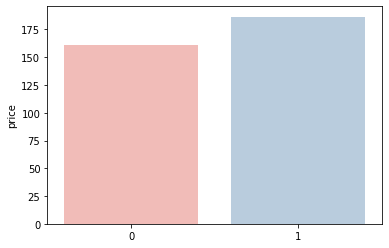

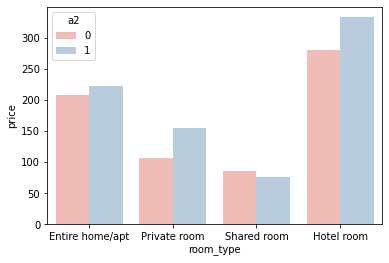


a3


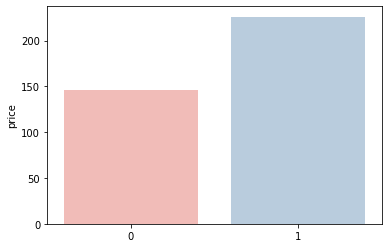

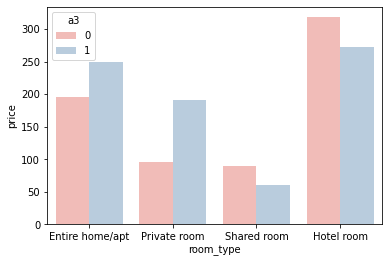


a4


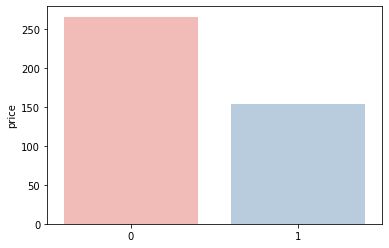

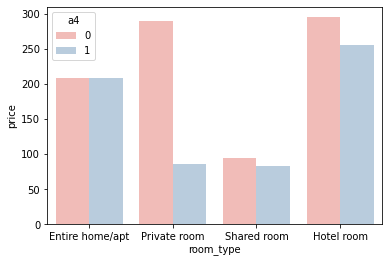


a5


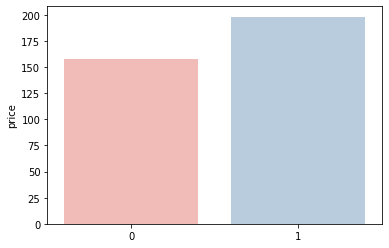

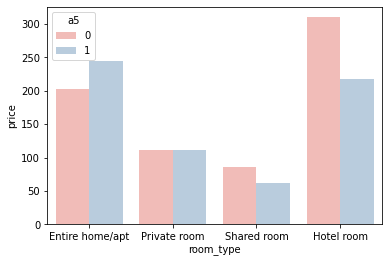


a6


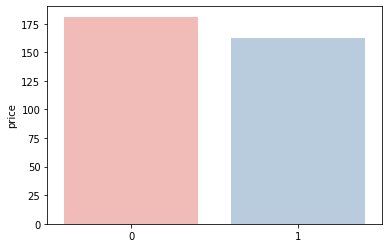

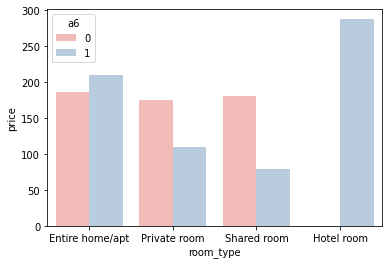


a7


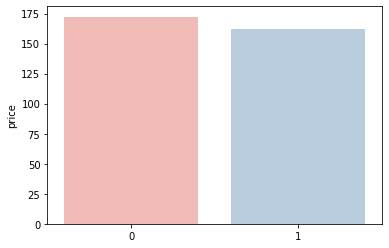

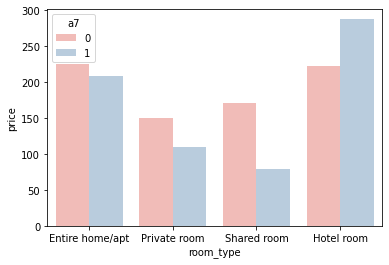


a8


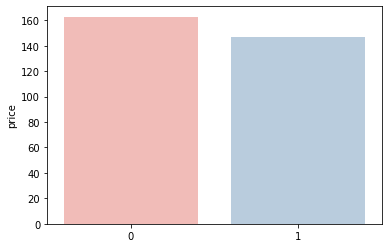

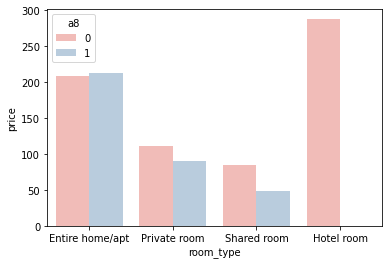


a9


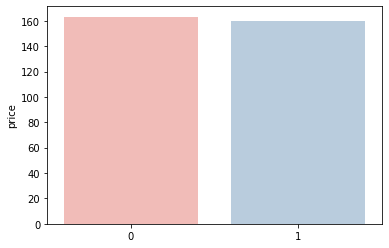

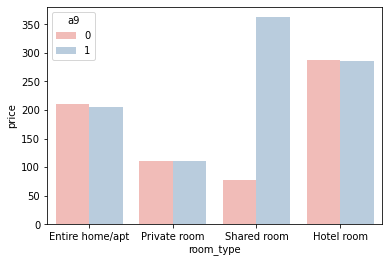


a10


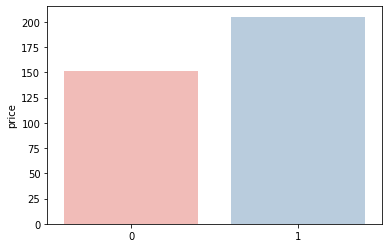

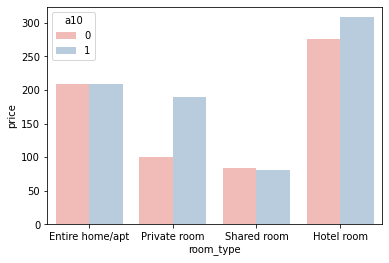


a11


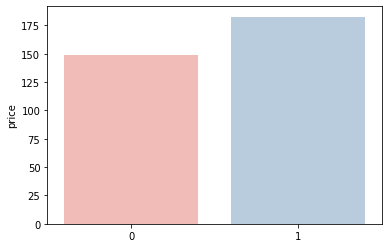

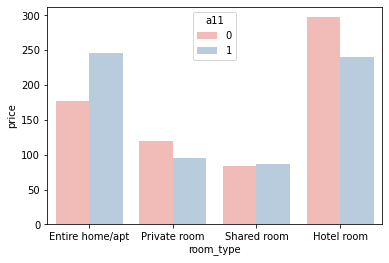


a12


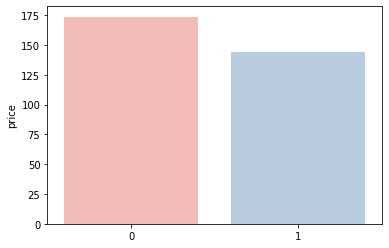

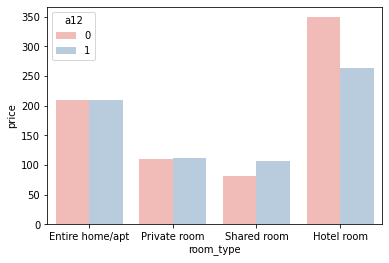


a13


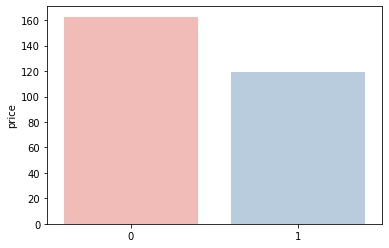

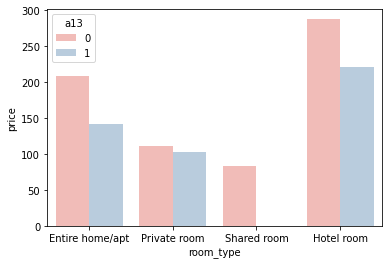


a14


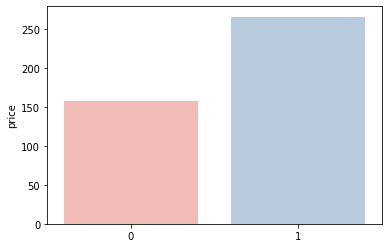

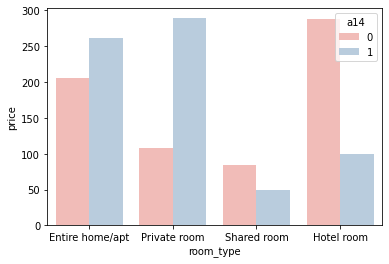

In [55]:
for i in amenities_n:
    print(i)
    sns.barplot(x=['0', '1'], y=(df['price'].groupby(df[i])).mean(), ci=None, palette='Pastel1')
    plt.show()
    sns.barplot(x='room_type', y='price', hue=i, data=df, ci=None, palette='Pastel1')
    plt.show()
    print('')

In [56]:
df.drop('amenities', axis=1, inplace=True)

**cancellation_policy**

In [57]:
df['cancellation_policy'].unique()

array(['strict_14_with_grace_period', 'moderate', 'flexible', 'strict',
       'super_strict_60', 'super_strict_30'], dtype=object)

In [58]:
(df['price'].groupby(df['cancellation_policy'])).mean()

cancellation_policy
flexible                       173.790681
moderate                       144.734262
strict                         215.784946
strict_14_with_grace_period    163.880614
super_strict_30                234.239437
super_strict_60                271.126280
Name: price, dtype: float64

In [59]:
df.groupby(['room_type', 'cancellation_policy']).mean()['price']

room_type        cancellation_policy        
Entire home/apt  flexible                       210.092006
                 moderate                       185.069580
                 strict                         215.784946
                 strict_14_with_grace_period    219.284511
                 super_strict_30                234.239437
                 super_strict_60                271.126280
Hotel room       flexible                       300.494565
                 moderate                       265.690987
                 strict_14_with_grace_period    268.253219
Private room     flexible                       144.688603
                 moderate                       100.007222
                 strict_14_with_grace_period     88.186577
Shared room      flexible                       105.304584
                 moderate                        59.082781
                 strict_14_with_grace_period     77.942873
Name: price, dtype: float64

# 5. 수치형 변수

latitude, longitude, accommodates, bathrooms, bedrooms, beds, security_deposit, cleaning_fee, guests_included, extra_people, minimum_nights, number_of_reviews_ltm, review_scores_rating, calculated_host_listings_count, review_updated

**extra_people -> object에서 float로 변경**

In [60]:
df['extra_people']=df['extra_people'].str.replace('$', '')
df['extra_people']=df['extra_people'].astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


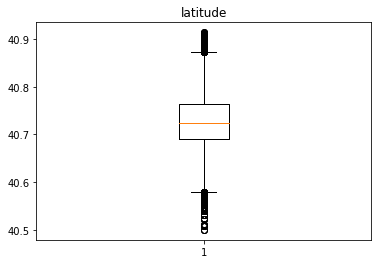

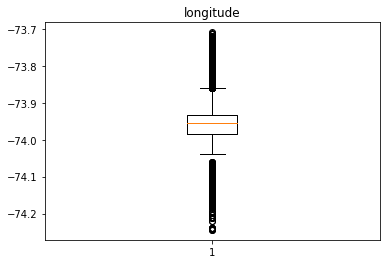

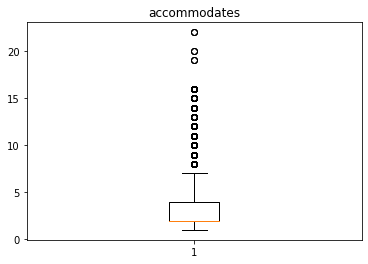

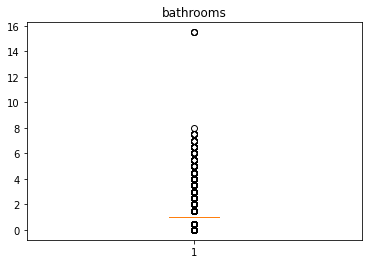

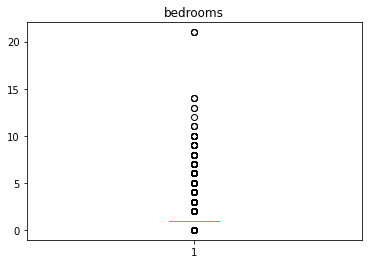

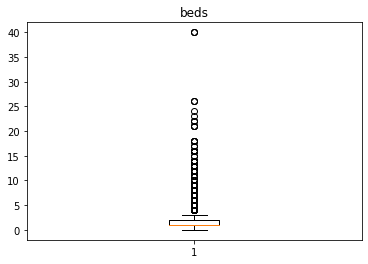

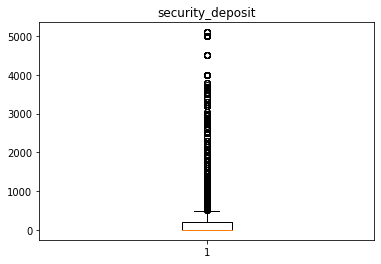

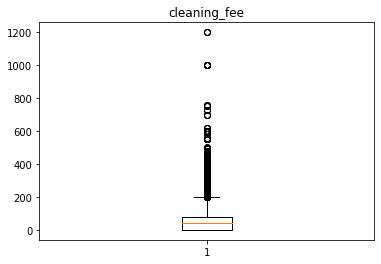

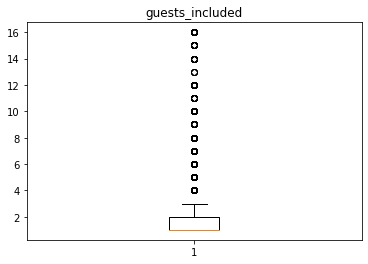

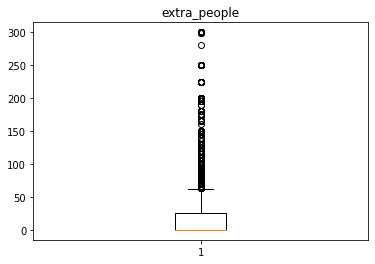

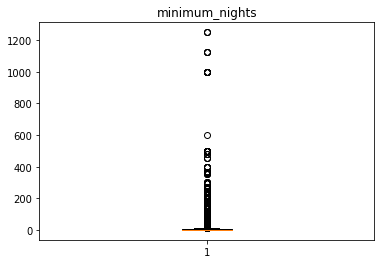

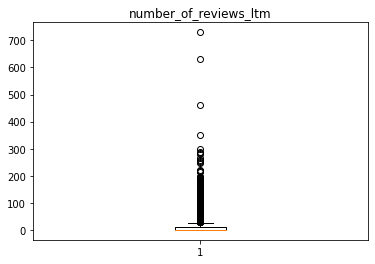

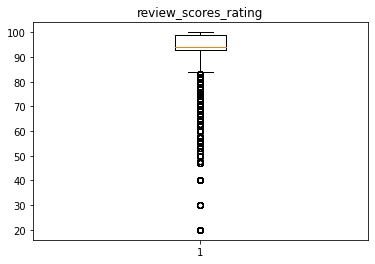

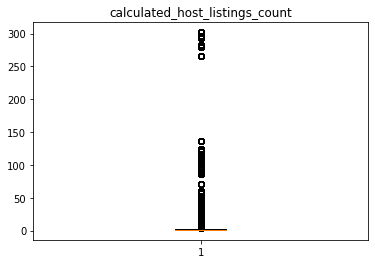

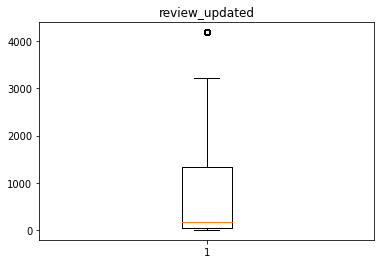

In [61]:
#이상값 확인
df_num=['latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 
        'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews_ltm', 'review_scores_rating', 
        'calculated_host_listings_count', 'review_updated']

for k in df_num:
    plt.boxplot(df[k])
    plt.title(k)
    plt.show()

In [62]:
df_num_col=['latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 
        'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews_ltm', 'review_scores_rating', 
        'calculated_host_listings_count', 'review_updated', 'price']

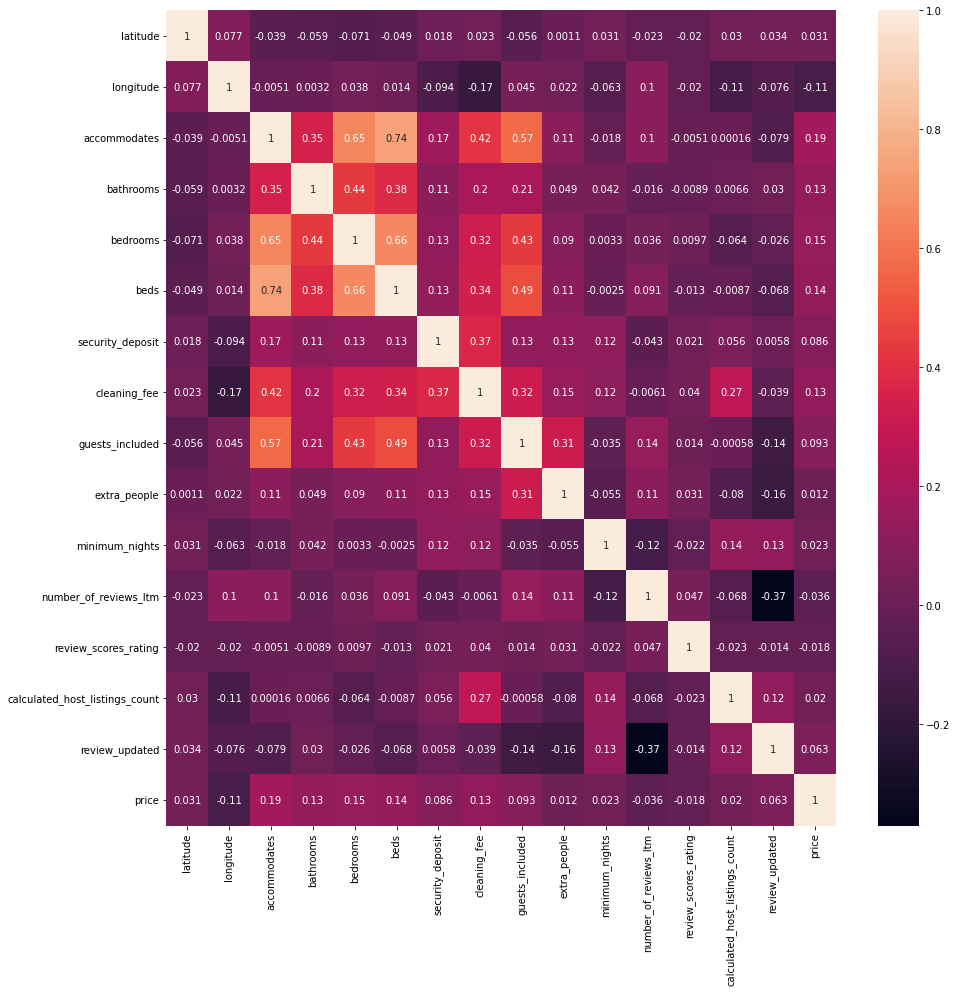

In [63]:
plt.figure(figsize=(15,15))
sns.heatmap(df.loc[:,df_num_col].corr(), cbar=True, annot=True)

**accommodates와 bed**

In [64]:
df['beds_per_accom'] = df['beds'] / df['accommodates']

In [65]:
df.drop(['beds', 'accommodates'], axis=1, inplace=True)

**crime_rate**
- https://maps.nyc.gov/crime/
- NYPD precinct 관할서마다 각각 몇개의 neighbourhood가 배정된다.

In [68]:
crime_rate=pd.read_csv('crime_rate.csv', index_col=0)

In [69]:
#crime = '/content/drive/MyDrive/bigdata_fintech_python-main/crime_rate.csv'
#crime_rate=pd.read_csv(crime, index_col=0)

In [70]:
crime_rate

,neighbourhood_group_cleansed,precinct,crime_rate
neighbourhood_cleansed,,,
Midtown,Manhattan,5,3.13
Murray Hill,Manhattan,17,2.56
Hell's Kitchen,Manhattan,10,3.61
Upper West Side,Manhattan,20,1.94
Chinatown,Manhattan,5,3.13
...,...,...,...
Olinville,Bronx,47,3.28
Edenwald,Bronx,47,3.28
Westchester Square,Bronx,42,4.98


In [71]:
crime_rate.drop(['neighbourhood_group_cleansed', 'precinct'], axis=1, inplace=True)

In [72]:
df = pd.merge(df, crime_rate, how='left', on='neighbourhood_cleansed')
df

,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,bathrooms,bedrooms,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews_ltm,review_scores_rating,instant_bookable,cancellation_policy,calculated_host_listings_count,price,review_updated,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,beds_per_accom,crime_rate
0,within a day,50.0,f,t,Midtown,Manhattan,40.753620,-73.983770,f,Housing,Entire home/apt,1.0,0.0,Real Bed,350.0,95.0,1,0.0,7,5,94.000000,f,strict_14_with_grace_period,2,225.0,100.0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,1.000000,3.13
1,within an hour,100.0,f,t,Clinton Hill,Brooklyn,40.685140,-73.959760,t,Basic_privacy_high,Entire home/apt,1.0,1.0,Real Bed,500.0,0.0,1,0.0,1,70,90.000000,f,moderate,1,89.0,5.0,1,0,0,1,1,1,1,0,0,0,0,1,0,1,1.333333,2.49
2,a few days or more,0.0,f,f,Murray Hill,Manhattan,40.747670,-73.975000,f,Housing,Entire home/apt,1.0,1.0,Real Bed,300.0,125.0,2,100.0,3,8,90.000000,f,moderate,1,200.0,122.0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0.500000,2.56
3,a few days or more,0.0,f,f,Bedford-Stuyvesant,Brooklyn,40.686880,-73.955960,f,Housing,Private room,1.0,1.0,Futon,450.0,0.0,1,30.0,29,1,90.000000,f,strict_14_with_grace_period,1,60.0,72.0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0.500000,3.27
4,within a few hours,90.0,f,f,Hell's Kitchen,Manhattan,40.764890,-73.984930,t,Housing,Private room,1.0,1.0,Real Bed,0.0,15.0,1,12.0,2,49,84.000000,f,strict_14_with_grace_period,1,79.0,16.0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0.500000,3.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153249,within an hour,100.0,f,f,Harlem,Manhattan,40.814840,-73.946340,f,Housing,Private room,1.0,1.0,Real Bed,0.0,0.0,1,0.0,5,0,93.868454,t,flexible,6,150.0,4191.0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0.500000,4.06
153250,within an hour,100.0,f,t,Upper West Side,Manhattan,40.769807,-73.987225,t,Housing,Entire home/apt,1.0,0.0,Real Bed,0.0,0.0,1,0.0,2,0,93.868454,t,flexible,1,149.0,4191.0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0.000000,1.94
153251,a few days or more,0.0,f,f,West Village,Manhattan,40.736252,-74.002622,t,Housing,Entire home/apt,1.0,0.0,Real Bed,0.0,0.0,1,0.0,3,0,93.868454,t,flexible,1,188.0,4191.0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0.500000,3.95
153252,a few days or more,0.0,f,f,Crown Heights,Brooklyn,40.663870,-73.953400,t,Housing,Private room,1.0,1.0,Real Bed,0.0,0.0,1,0.0,1,0,93.868454,f,flexible,2,1100.0,4191.0,0,1,1,1,0,1,1,0,1,0,1,1,0,0,0.500000,2.47


**tourspot**
- 각 에어비앤비 숙소의 반경 3Km 이내에 몇 개의 tourspot이 존재하는지를 계산 
- tourspot_dist라는 새로운 feature를 만들었다

In [ ]:
tour = 'tourspot.xlsx'
tourspot = pd.read_excel(tour)

In [73]:
#tour = '/content/drive/MyDrive/bigdata_fintech_python-main/tourspot.xlsx'
#tourspot = pd.read_excel(tour)

In [74]:
tourspot

,latitude,longitude
0,40.779648,-73.963265
1,40.689461,-74.044543
2,40.760261,-73.986220
3,40.704952,-73.995390


In [75]:
!pip install haversine
from haversine import haversine
a = df['latitude']
b = df['longitude']
c = tourspot['latitude']
d = tourspot['longitude']
tourspot1 = []
tourspot2 = []
tourspot3 = []
tourspot4 = []


for i in range(len(a)):
    A = (a[i],b[i])
    B = (c[0],d[0])
    tourspot1.append(haversine(A,B, unit = 'km'))#A,B간의 거리를 km로 전환해서 구하는 함수

for i in range(len(a)):
    A = (a[i],b[i])
    B = (c[1],d[1])
    tourspot2.append(haversine(A,B, unit = 'km'))

for i in range(len(a)):
    A = (a[i],b[i])
    B = (c[1],d[1])
    tourspot3.append(haversine(A,B, unit = 'km'))

for i in range(len(a)):
    A = (a[i],b[i])
    B = (c[1],d[1])
    tourspot4.append(haversine(A,B, unit = 'km'))

In [76]:
tourspot_km = pd.DataFrame([tourspot1,tourspot2,tourspot3,tourspot4]).T

In [77]:
tourspot_km.describe() #3km 기준으로 설정하기. 

,0,1,2,3
count,153254.000000,153254.000000,153254.000000,153254.000000
mean,8.012114,10.636709,10.636709,10.636709
std,4.675117,4.694056,4.694056,4.694056
min,0.146978,2.509610,2.509610,2.509610
25%,4.285866,7.412645,7.412645,7.412645
50%,7.373702,9.339672,9.339672,9.339672
75%,10.813961,13.116850,13.116850,13.116850
max,38.947606,29.589561,29.589561,29.589561


In [78]:
tourspot_dist = []
for i in range(len(tourspot_km)):
    if (tourspot_km[0][i] <= 3) | (tourspot_km[1][i] <= 3) | (tourspot_km[2][i] <= 3) | (tourspot_km[3][i] <= 3) : 
        tourspot_dist.append(1)
    else:
        tourspot_dist.append(0)

In [79]:
tourspot_dist = pd.DataFrame(tourspot_dist)
tourspot_dist.value_counts()
tourspot_dist.columns = ['tourspot_dist'] 

In [80]:
from dataclasses import dataclass
df = pd.concat([df,tourspot_dist],axis = 1)

In [81]:
df.head()

,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,bathrooms,bedrooms,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews_ltm,review_scores_rating,instant_bookable,cancellation_policy,calculated_host_listings_count,price,review_updated,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,beds_per_accom,crime_rate,tourspot_dist
0,within a day,50.0,f,t,Midtown,Manhattan,40.75362,-73.98377,f,Housing,Entire home/apt,1.0,0.0,Real Bed,350.0,95.0,1,0.0,7,5,94.0,f,strict_14_with_grace_period,2,225.0,100.0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,1.000000,3.13,0
1,within an hour,100.0,f,t,Clinton Hill,Brooklyn,40.68514,-73.95976,t,Basic_privacy_high,Entire home/apt,1.0,1.0,Real Bed,500.0,0.0,1,0.0,1,70,90.0,f,moderate,1,89.0,5.0,1,0,0,1,1,1,1,0,0,0,0,1,0,1,1.333333,2.49,0
2,a few days or more,0.0,f,f,Murray Hill,Manhattan,40.74767,-73.97500,f,Housing,Entire home/apt,1.0,1.0,Real Bed,300.0,125.0,2,100.0,3,8,90.0,f,moderate,1,200.0,122.0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0.500000,2.56,0
3,a few days or more,0.0,f,f,Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,f,Housing,Private room,1.0,1.0,Futon,450.0,0.0,1,30.0,29,1,90.0,f,strict_14_with_grace_period,1,60.0,72.0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0.500000,3.27,0
4,within a few hours,90.0,f,f,Hell's Kitchen,Manhattan,40.76489,-73.98493,t,Housing,Private room,1.0,1.0,Real Bed,0.0,15.0,1,12.0,2,49,84.0,f,strict_14_with_grace_period,1,79.0,16.0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0.500000,3.61,1


In [82]:
df[['latitude', 'longitude']].describe()

,latitude,longitude
count,153254.000000,153254.000000
mean,40.729086,-73.950828
std,0.054865,0.047666
min,40.499790,-74.244420
25%,40.689700,-73.983160
50%,40.723360,-73.955150
75%,40.763090,-73.934010
max,40.914290,-73.708400


In [83]:
df[['latitude', 'longitude']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153254 entries, 0 to 153253
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   latitude   153254 non-null  float64
 1   longitude  153254 non-null  float64
dtypes: float64(2)
memory usage: 7.5 MB


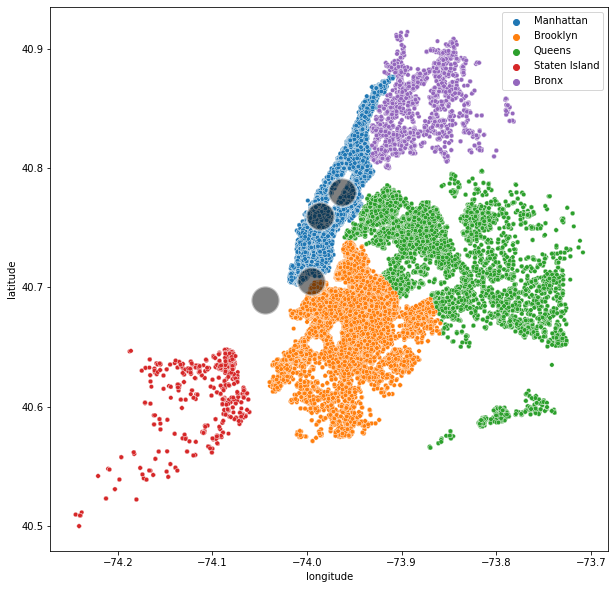

In [84]:
#그래프 
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group_cleansed',s=20, data=df)
sns.scatterplot(x='longitude', y='latitude' ,s=800, data=tourspot, alpha = 0.5, color = 'black')

**near sub**
- 각 에어비앤비 숙소의 반경 500m 이내에 몇 개의 지하철역이 존재하는지를 계산 
- near_sub라는 새로운 feature를 만들었다

In [ ]:
sub_count=pd.read_csv('sub_count.csv', index_col=0)

In [85]:
#sub = '/content/drive/MyDrive/bigdata_fintech_python-main/test.csv'
#sub_count = pd.read_csv(sub)

In [86]:
sub_count.head()

,Unnamed: 0,sub_count
0,0,4
1,1,1
2,2,1
3,3,2
4,4,2


In [87]:
data=pd.concat([df, sub_count],axis=1, ignore_index=False)

In [88]:
data.head()

,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,bathrooms,bedrooms,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews_ltm,review_scores_rating,instant_bookable,cancellation_policy,calculated_host_listings_count,price,review_updated,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,beds_per_accom,crime_rate,tourspot_dist,Unnamed: 0,sub_count
0,within a day,50.0,f,t,Midtown,Manhattan,40.75362,-73.98377,f,Housing,Entire home/apt,1.0,0.0,Real Bed,350.0,95.0,1,0.0,7,5,94.0,f,strict_14_with_grace_period,2,225.0,100.0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,1.000000,3.13,0,0,4
1,within an hour,100.0,f,t,Clinton Hill,Brooklyn,40.68514,-73.95976,t,Basic_privacy_high,Entire home/apt,1.0,1.0,Real Bed,500.0,0.0,1,0.0,1,70,90.0,f,moderate,1,89.0,5.0,1,0,0,1,1,1,1,0,0,0,0,1,0,1,1.333333,2.49,0,1,1
2,a few days or more,0.0,f,f,Murray Hill,Manhattan,40.74767,-73.97500,f,Housing,Entire home/apt,1.0,1.0,Real Bed,300.0,125.0,2,100.0,3,8,90.0,f,moderate,1,200.0,122.0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0.500000,2.56,0,2,1
3,a few days or more,0.0,f,f,Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,f,Housing,Private room,1.0,1.0,Futon,450.0,0.0,1,30.0,29,1,90.0,f,strict_14_with_grace_period,1,60.0,72.0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0.500000,3.27,0,3,2
4,within a few hours,90.0,f,f,Hell's Kitchen,Manhattan,40.76489,-73.98493,t,Housing,Private room,1.0,1.0,Real Bed,0.0,15.0,1,12.0,2,49,84.0,f,strict_14_with_grace_period,1,79.0,16.0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0.500000,3.61,1,4,2


In [89]:
!pip install geopandas
import seaborn as sns
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point, Polygon, LineString
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 33.4 MB/s 
     |████████████████████████████████| 16.7 MB 179 kB/s 


In [90]:
ss = '/content/drive/MyDrive/bigdata_fintech_python-main/rows.csv'
ny_sub = pd.read_csv(ss)
ny_sub.T.head(50)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867
Division,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,...,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT,IRT
Line,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,4 Avenue,...,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,White Plains Road,Flushing,Flushing
Station Name,25th St,25th St,36th St,36th St,36th St,45th St,45th St,45th St,45th St,53rd St,53rd St,53rd St,53rd St,53rd St,59th St,59th St,59th St,59th St,59th St,59th St,77th St,77th St,77th St,86th St,86th St,86th St,95th St,95th St,95th St,95th St,95th St,9th St,9th St,Atlantic Av-Barclays Ctr,Bay Ridge Av,Bay Ridge Av,Bay Ridge Av,DeKalb Av,DeKalb Av,DeKalb Av,...,East 180th St,East 180th St,East Tremont Av-West Farms Sq,East Tremont Av-West Farms Sq,East Tremont Av-West Farms Sq,East Tremont Av-West Farms Sq,East Tremont Av-West Farms Sq,Freeman St,Freeman St,Freeman St,Freeman St,Gun Hill Rd,Gun Hill Rd,Intervale Av,Intervale Av,Intervale Av,Jackson Av,Jackson Av,Jackson Av,Jackson Av,Pelham Parkway,Pelham Parkway,Pelham Parkway,Pelham Parkway,Pelham Parkway,Prospect Av,Prospect Av,Prospect Av,Prospect Av,Prospect Av,Simpson St,Simpson St,Simpson St,Simpson St,Simpson St,Wakefield-241st St,Wakefield-241st St,Wakefield-241st St,34 St Hudson Yards,34 St Hudson Yards
Station Latitude,40.660397,40.660397,40.655144,40.655144,40.655144,40.648939,40.648939,40.648939,40.648939,40.645069,40.645069,40.645069,40.645069,40.645069,40.641362,40.641362,40.641362,40.641362,40.641362,40.641362,40.629742,40.629742,40.629742,40.622687,40.622687,40.622687,40.616622,40.616622,40.616622,40.616622,40.616622,40.670847,40.670847,40.683666,40.634967,40.634967,40.634967,40.690635,40.690635,40.690635,...,40.841894,40.841894,40.840295,40.840295,40.840295,40.840295,40.840295,40.829993,40.829993,40.829993,40.829993,40.87785,40.87785,40.822181,40.822181,40.822181,40.81649,40.81649,40.81649,40.81649,40.857192,40.857192,40.857192,40.857192,40.857192,40.819585,40.819585,40.819585,40.819585,40.819585,40.824073,40.824073,40.824073,40.824073,40.824073,40.903125,40.903125,40.903125,40.755882,40.755882
Station Longitude,-73.998091,-73.998091,-74.003549,-74.003549,-74.003549,-74.010006,-74.010006,-74.010006,-74.010006,-74.014034,-74.014034,-74.014034,-74.014034,-74.014034,-74.017881,-74.017881,-74.017881,-74.017881,-74.017881,-74.017881,-74.02551,-74.02551,-74.02551,-74.028398,-74.028398,-74.028398,-74.030876,-74.030876,-74.030876,-74.030876,-74.030876,-73.988302,-73.988302,-73.97881,-74.023377,-74.023377,-74.023377,-73.981824,-73.981824,-73.981824,...,-73.873488,-73.873488

In [91]:
ny_sub.dtypes

Division               object
Line                   object
Station Name           object
Station Latitude      float64
Station Longitude     float64
Route1                 object
Route2                 object
Route3                 object
Route4                 object
Route5                 object
Route6                 object
Route7                 object
Route8                float64
Route9                float64
Route10               float64
Route11               float64
Entrance Type          object
Entry                  object
Exit Only              object
Vending                object
Staffing               object
Staff Hours            object
ADA                      bool
ADA Notes              object
Free Crossover           bool
North South Street     object
East West Street       object
Corner                 object
Entrance Latitude     float64
Entrance Longitude    float64
Station Location       object
Entrance Location      object
dtype: object

In [92]:
ny_sub.columns

Index(['Division', 'Line', 'Station Name', 'Station Latitude',
       'Station Longitude', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5',
       'Route6', 'Route7', 'Route8', 'Route9', 'Route10', 'Route11',
       'Entrance Type', 'Entry', 'Exit Only', 'Vending', 'Staffing',
       'Staff Hours', 'ADA', 'ADA Notes', 'Free Crossover',
       'North South Street', 'East West Street', 'Corner', 'Entrance Latitude',
       'Entrance Longitude', 'Station Location', 'Entrance Location'],
      dtype='object')

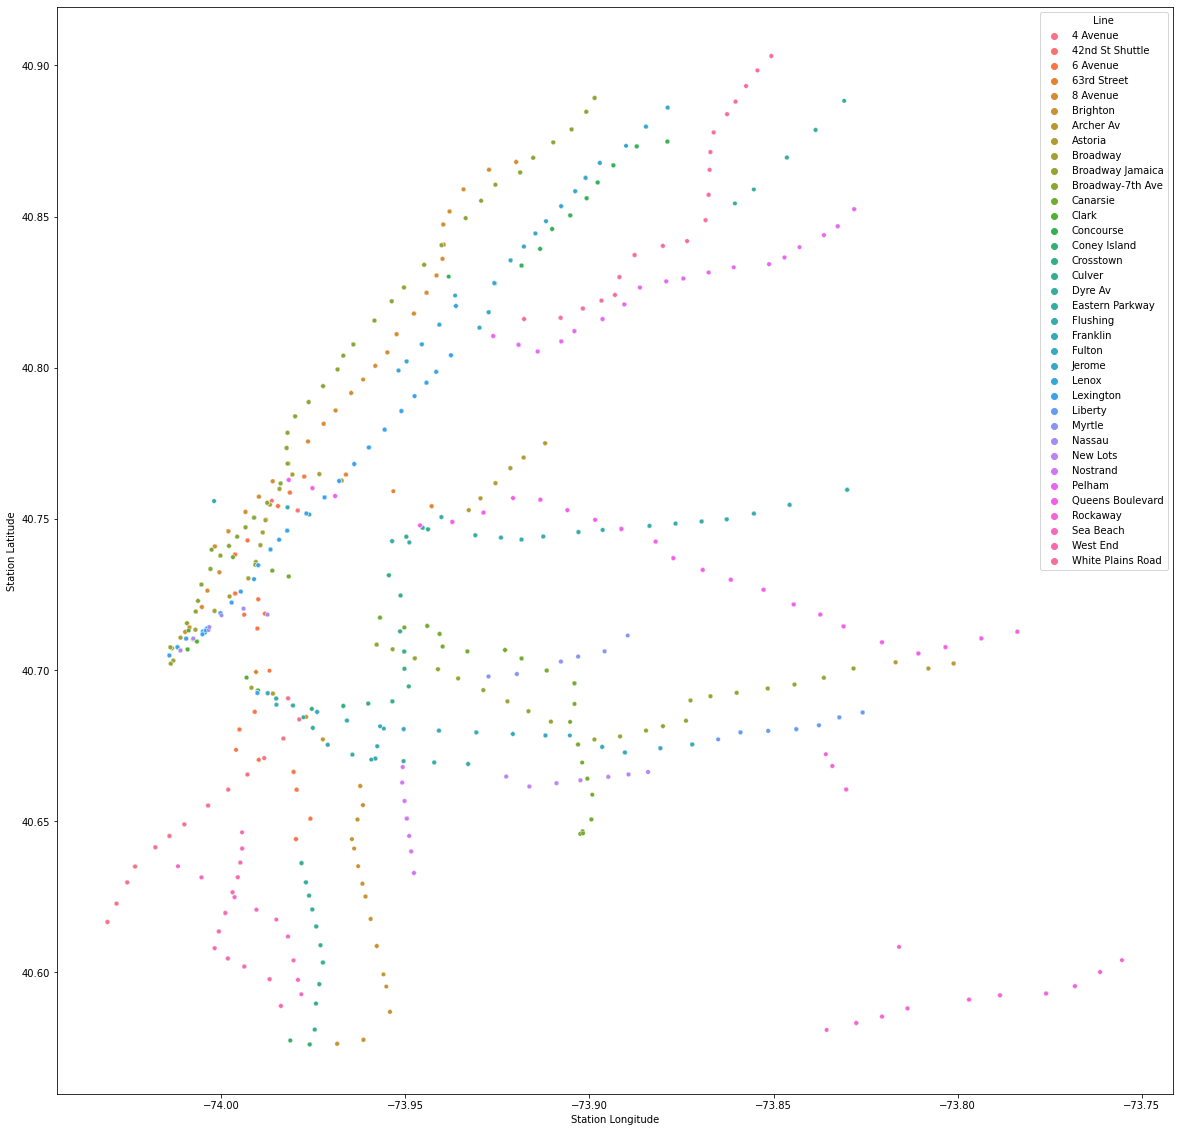

In [93]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='Station Longitude', y='Station Latitude', hue='Line',s=20, data=ny_sub)

# 6. 더미변수

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153254 entries, 0 to 153253
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_response_time              153254 non-null  object 
 1   host_response_rate              153254 non-null  float64
 2   host_is_superhost               153254 non-null  object 
 3   host_identity_verified          153254 non-null  object 
 4   neighbourhood_cleansed          153254 non-null  object 
 5   neighbourhood_group_cleansed    153254 non-null  object 
 6   latitude                        153254 non-null  float64
 7   longitude                       153254 non-null  float64
 8   is_location_exact               153254 non-null  object 
 9   property_type                   153254 non-null  object 
 10  room_type                       153254 non-null  object 
 11  bathrooms                       153254 non-null  float64
 12  bedrooms        

In [95]:
ob=['host_response_time', 'neighbourhood_group_cleansed','property_type', 
    'room_type', 'bed_type', 'cancellation_policy', 'host_is_superhost', 
    'host_identity_verified', 'is_location_exact', 'instant_bookable']

- 'neighbourhood_cleansed', 'latitude', 'longitude' drop

In [96]:
df.drop(['neighbourhood_cleansed', 'latitude', 'longitude' ], axis=1, inplace=True)

In [97]:
df=pd.get_dummies(df, columns=['host_response_time'], drop_first=True)
df=pd.get_dummies(df, columns=['neighbourhood_group_cleansed'], drop_first=True)
df=pd.get_dummies(df, columns=['property_type'], drop_first=True)
df=pd.get_dummies(df, columns=['room_type'], drop_first=True)
df=pd.get_dummies(df, columns=['bed_type'], drop_first=True)
df=pd.get_dummies(df, columns=['cancellation_policy'], drop_first=True)
df=pd.get_dummies(df, columns=['host_is_superhost'], drop_first=True)
df=pd.get_dummies(df, columns=['host_identity_verified'], drop_first=True)
df=pd.get_dummies(df, columns=['is_location_exact'], drop_first=True)
df=pd.get_dummies(df, columns=['instant_bookable'], drop_first=True)

# 7. Scaling
- standard scaler

In [98]:
df.columns

Index(['host_response_rate', 'bathrooms', 'bedrooms', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'number_of_reviews_ltm', 'review_scores_rating',
       'calculated_host_listings_count', 'price', 'review_updated', 'a1', 'a2',
       'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12', 'a13',
       'a14', 'beds_per_accom', 'crime_rate', 'tourspot_dist',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour',
       'neighbourhood_group_cleansed_Brooklyn',
       'neighbourhood_group_cleansed_Manhattan',
       'neighbourhood_group_cleansed_Queens',
       'neighbourhood_group_cleansed_Staten Island',
       'property_type_Basic_privacy_low', 'property_type_Housing',
       'property_type_Special_experience_high',
       'property_type_Special_experience_low', 'property_type_other',
       'room_type_Hotel room', 'room_type_Private room',
  

In [99]:
X=df[['host_response_rate', 'bathrooms', 'bedrooms',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'number_of_reviews_ltm', 'review_scores_rating',
       'calculated_host_listings_count', 'review_updated', 'a1', 'a2',
       'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12', 'a13', 'a14',
       'beds_per_accom', 'crime_rate', 'tourspot_dist',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour',
       'neighbourhood_group_cleansed_Brooklyn',
       'neighbourhood_group_cleansed_Manhattan',
       'neighbourhood_group_cleansed_Queens',
       'neighbourhood_group_cleansed_Staten Island',
       'property_type_Basic_privacy_low', 'property_type_Housing',
       'property_type_Special_experience_high',
       'property_type_Special_experience_low', 'property_type_other',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'bed_type_Couch', 'bed_type_Futon',
       'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60', 'host_is_superhost_t',
       'host_identity_verified_t', 'is_location_exact_t',
       'instant_bookable_t']] # 설명변수 묶어줌
y=df['price']

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
x_test

,host_response_rate,bathrooms,bedrooms,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews_ltm,review_scores_rating,calculated_host_listings_count,review_updated,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,beds_per_accom,crime_rate,tourspot_dist,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,property_type_Basic_privacy_low,property_type_Housing,property_type_Special_experience_high,property_type_Special_experience_low,property_type_other,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,host_is_superhost_t,host_identity_verified_t,is_location_exact_t,instant_bookable_t
20677,100.0,1.0,0.0,300.0,100.0,2,50.0,2,21,98.000000,1,45.0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1.000000,3.99,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0
11916,0.0,1.0,0.0,0.0,70.0,2,60.0,3,0,80.000000,1,1503.0,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0.333333,3.99,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0
98081,100.0,1.0,1.0,300.0,100.0,2,300.0,10,3,100.000000,1,18.0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0.500000,2.47,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1
129034,0.0,2.0,1.0,0.0,0.0,1,0.0,2,0,100.000000,1,713.0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0.250000,4.06,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
148744,60.0,1.0,1.0,100.0,10.0,1,0.0,1,0,93.868454,1,4191.0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0.000000,3.63,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23241,100.0,1.0,0.0,100.0,99.0,1,0.0,2,0,87.000000,13,480.0,0,0,1,1,1,1,1,0,1,1,1,1,0,0,0.500000,3.13,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1
15867,0.0,2.0,2.0,225.0,80.0,1,0.0,1,0,100.000000,1,1266.0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0.750000,2.49,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
152259,100.0,2.0,1.0,100.0,8.0,1,0.0,1,2,100.000000,8,9.0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1.000000,1.93,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1
46782,100.0,1.0,1.0,0.0,8.0,1,0.0,1,1,100.000000,8,66.0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1.000000,2.84,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1


In [157]:
from sklearn.preprocessing import StandardScaler

std = preprocessing.StandardScaler()
x_train= std.fit_transform(x_train)
x_test = std.transform(x_test)

In [158]:
columns_name=X.columns

In [159]:
x_train=pd.DataFrame(x_train, columns=columns_name)
x_test=pd.DataFrame(x_test, columns=columns_name)

# 8. VIF
- vif값이 10이 넘지 않을때까지 vif값이 높은 변수들을 빼준것 > 'host_response_rate' 와 'neighbourhood_group_cleansed_Manhattan'을 빼주었다.
- vif 다중공선성의 문제가 있는 변수를 제거하고 다시 모델링해 본 결과.

In [160]:
X_std=pd.concat([x_train, x_test], axis=0, ignore_index=False)
y_std=pd.concat([y_train, y_test], axis=0, ignore_index=False)

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_std.values, i) for i in range(X_std.shape[1])]
vif["features"] = X_std.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.001871,a13
1,1.015724,cancellation_policy_super_strict_30
2,1.017505,a8
3,1.019396,a2
4,1.025267,property_type_Special_experience_low
5,1.029140,is_location_exact_t
6,1.040562,property_type_other
7,1.053753,property_type_Basic_privacy_low
8,1.054123,cancellation_policy_strict
9,1.063191,a1


In [161]:
x_train_vif = x_train.drop(['host_response_rate'], axis=1)
x_test_vif = x_test.drop(['host_response_rate'], axis=1)

In [162]:
X_vif=pd.concat([x_train_vif, x_test_vif], axis=0)

**vif값이 큰 'host_response_rate'을 제거해주고 다시 vif값을 구해봄**

In [135]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_vif.values, i) for i in range(X_vif.shape[1])]
vif["features"] = X_vif.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.001870,a13
1,1.015669,cancellation_policy_super_strict_30
2,1.017469,a8
3,1.019389,a2
4,1.025264,property_type_Special_experience_low
5,1.029139,is_location_exact_t
6,1.040549,property_type_other
7,1.053750,property_type_Basic_privacy_low
8,1.054059,cancellation_policy_strict
9,1.063162,a1


**vif값이 큰 'neighbourhood_group_cleansed_Manhattan'도 제거해줌**

In [163]:
x_train_vif = x_train_vif.drop(['neighbourhood_group_cleansed_Manhattan'], axis=1)
x_test_vif = x_test_vif.drop(['neighbourhood_group_cleansed_Manhattan'], axis=1)

### 다중공선성까지 고려해 최종변수 선택, 모델링 시작

# 9. 모델링

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge 
from xgboost import XGBRegressor # 회귀트리 모델
from xgboost import plot_importance # 중요변수 시각화
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from itertools import product

## Linear Regression

In [ ]:
lr=LinearRegression(fit_intercept=True)

In [ ]:
lr.fit(x_train_vif, y_train) 

LinearRegression()

In [ ]:
lr.intercept_

163.3086221381206

**linear regression 변수(=var) - 계수(=coeff)**

In [ ]:
lin_coeff = pd.DataFrame()
lin_coeff['var'] = x_train_vif.columns
lin_coeff['coeff'] = lr.coef_
lin_coeff.sort_values(ascending = False, by = 'coeff', inplace=True)
lin_coeff

,var,coeff
1,bedrooms,36.053688
0,bathrooms,30.134988
10,review_updated,20.798990
13,a3,19.018686
27,tourspot_dist,15.920433
2,security_deposit,13.975135
3,cleaning_fee,13.256118
54,instant_bookable_t,12.598720
24,a14,12.257737
4,guests_included,7.854367


In [ ]:
lr_pred_vif = lr.predict(x_test_vif)

#R^2
r2_lr = lr.score(x_test_vif, y_test)

#RMSE
mse_lr_test = mean_squared_error(y_test, lr_pred_vif)
rmse_lr_test = mse_lr_test**(0.5)

#MAE
mae_lr_test = mean_absolute_error(y_test, lr_pred_vif)
print('linear regression \nR-square : %.6f \nRMSE : %.6f \nMAE : %.6f'%(r2_lr, rmse_lr_test,mae_lr_test))
n = len(x_test_vif)
p = len(x_test_vif.columns)

# adj=R^2
adj_r2_lr = 1-((n-1)*(1-r2_lr))/(n-p-1)
print('adj r2', adj_r2_lr)

linear regression 
R-square : 0.096391 
RMSE : 339.958643 
MAE : 96.764314
adj r2 0.09476674687000519


## Ridge Regression

In [223]:
ridge = Ridge() #파라메타 설정 없이 먼저 해보기 
ridge.fit(x_train_vif, y_train)

rdg_pred_vif = ridge.predict(x_test_vif) 

mse_rdg = mean_squared_error(y_test,rdg_pred_vif) 
rmse_rdg = np.sqrt(mse_rdg) 
r2_rdg  = ridge.score(x_test_vif, y_test)
mae_rdg = mean_absolute_error(y_test,rdg_pred_vif)

n = len(x_test_vif)
p = len(x_test_vif.columns)

adj_r2_rdg = 1-((n-1)*(1-r2_rdg))/(n-p-1)

print('mse : ',mse_rdg)
print('rmse : ',rmse_rdg)
print('r2 : ',r2_rdg)
print('mae : ',mae_rdg)
print('adj_r2', adj_r2_rdg)

mse :  115571.83630215537
rmse :  339.9585802743554
r2 :  0.09639147872358345
mae :  96.76389571444066
adj_r2 0.09476708033593173


In [224]:
ridge_coef = pd.DataFrame(data=ridge.coef_)
ridge_coef.index = x_train_vif.columns
ridge_coef.columns = ['coeff']
ridge_coef['abs_coeff'] = abs(ridge_coef['coeff'])
ridge_coef.sort_values(ascending = False, by = 'abs_coeff', inplace=True)
ridge_coef

,coeff,abs_coeff
property_type_Housing,-66.936402,66.936402
a4,-38.141714,38.141714
bedrooms,36.053404,36.053404
neighbourhood_group_cleansed_Brooklyn,-32.573811,32.573811
bathrooms,30.134809,30.134809
neighbourhood_group_cleansed_Queens,-28.532459,28.532459
room_type_Private room,-25.522489,25.522489
room_type_Hotel room,-23.098040,23.098040
property_type_Special_experience_high,-23.045672,23.045672
review_updated,20.798857,20.798857


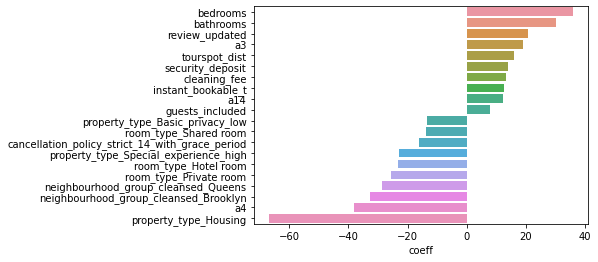

In [225]:
ridge_coef_high = ridge_coef.sort_values(by='coeff',ascending=False).head(10) 
ridge_coef_low = ridge_coef.sort_values(by='coeff',ascending=False).tail(10)
ridge_coef_concat = pd.concat([ridge_coef_high, ridge_coef_low])
sns.barplot(x=ridge_coef_concat.coeff, y=ridge_coef_concat.index) 

In [226]:
params = {'alpha' : np.arange(0, 101, 1) }
gridsearch = GridSearchCV(ridge, param_grid = params)

gridsearch.fit(x_train_vif, y_train)

ridge_estimator = gridsearch.best_estimator_
y_pred = ridge_estimator.predict(x_test_vif)

print(gridsearch.best_params_)
print(ridge_estimator.score(x_test_vif,y_test))

{'alpha': 100}
0.0964242466814863


In [227]:
for a in (np.arange(0, 101, 10) ):
    ridge = Ridge(alpha=a)
    ridge.fit(x_train_vif, y_train)
    ridge_pred_vif = ridge.predict(x_test_vif)
    r2_rdg = ridge.score(x_test_vif, y_test)
    print('alpha=',a,':', 'R-square=', r2_rdg)

alpha= 0 : R-square= 0.09639114585604591
alpha= 10 : R-square= 0.09639447283607172
alpha= 20 : R-square= 0.09639779605104859
alpha= 30 : R-square= 0.09640111550475494
alpha= 40 : R-square= 0.0964044312009642
alpha= 50 : R-square= 0.09640774314344547
alpha= 60 : R-square= 0.09641105133596228
alpha= 70 : R-square= 0.09641435578227309
alpha= 80 : R-square= 0.09641765648613254
alpha= 90 : R-square= 0.09642095345128876
alpha= 100 : R-square= 0.0964242466814863


In [228]:
ridge = Ridge(alpha= 100 )  
ridge.fit(x_train_vif, y_train)

rdg_pred_vif = ridge.predict(x_test_vif) 

mse_rdg = mean_squared_error(y_test,rdg_pred_vif) 
rmse_rdg = np.sqrt(mse_rdg) 
r2_rdg  = ridge.score(x_test_vif, y_test)
mae_rdg = mean_absolute_error(y_test,rdg_pred_vif)

n = len(x_test_vif)
p = len(x_test_vif.columns)

adj_r2_rdg = 1-((n-1)*(1-r2_rdg))/(n-p-1)

print('mse : ',mse_rdg)
print('rmse : ',rmse_rdg)
print('r2 : ',r2_rdg)
print('mae : ',mae_rdg)
print('adj_r2', adj_r2_rdg)

mse :  115567.64526922735
rmse :  339.952416183835
r2 :  0.0964242466814863
mae :  96.7226243578102
adj_r2 0.09479990720011622


In [229]:
ridge_coef = pd.DataFrame(data=ridge.coef_)
ridge_coef.index = x_train_vif.columns
ridge_coef.columns = ['coeff']
ridge_coef['abs_coeff'] = abs(ridge_coef['coeff'])
ridge_coef.sort_values(ascending = False, by = 'abs_coeff', inplace=True)
ridge_coef
#alpha 값을 높이니 계수가 줄어듬

,coeff,abs_coeff
property_type_Housing,-66.823439,66.823439
a4,-38.110728,38.110728
bedrooms,36.025329,36.025329
neighbourhood_group_cleansed_Brooklyn,-32.516901,32.516901
bathrooms,30.117147,30.117147
neighbourhood_group_cleansed_Queens,-28.471416,28.471416
room_type_Private room,-25.493353,25.493353
room_type_Hotel room,-23.032615,23.032615
property_type_Special_experience_high,-22.968399,22.968399
review_updated,20.785708,20.785708


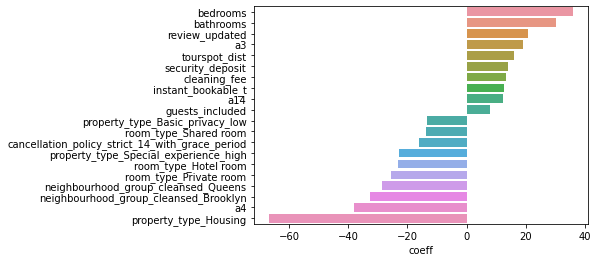

In [230]:
ridge_coef_high = ridge_coef.sort_values(by='coeff',ascending=False).head(10) 
ridge_coef_low = ridge_coef.sort_values(by='coeff',ascending=False).tail(10)
ridge_coef_concat = pd.concat([ridge_coef_high, ridge_coef_low])
sns.barplot(x=ridge_coef_concat.coeff, y=ridge_coef_concat.index) 

## Lasso Regression

In [ ]:
lasso = Lasso() #default-> alpha : 1
lasso.fit(x_train_vif, y_train)

lasso_pred_vif = lasso.predict(x_test_vif)

#R^2
r2_lasso = r2_score(y_test, lasso_pred_vif)

#RMSE
mse_lasso_test = mean_squared_error(y_test, lasso_pred_vif)
rmse_lasso_test = mse_lasso_test**(0.5)

#MAE
mae_lasso_test = mean_absolute_error(y_test, lasso_pred_vif)
print('Lasso regression \nR-square : %.6f \nRMSE : %.6f \nMAE : %.6f'%(r2_lasso, rmse_lasso_test,mae_lasso_test))
n = len(x_test_vif)
p = len(x_test_vif.columns)

# adj=R^2
adj_r2_lasso = 1-((n-1)*(1-r2_lasso))/(n-p-1)
print('Adj R-square :', adj_r2_lasso)

Lasso regression 
R-square : 0.097848 
RMSE : 339.684508 
MAE : 94.329473
Adj R-square : 0.0962260761858571


In [ ]:
lasso_coef = pd.DataFrame(data=lasso.coef_)
lasso_coef.index = x_train_vif.columns
lasso_coef.columns = ['coeff']
lasso_coef['abs_coeff'] = abs(lasso_coef['coeff'])
lasso_coef.sort_values(ascending = False, by = 'abs_coeff', inplace=True)
lasso_coef

,coeff,abs_coeff
property_type_Housing,-64.091589,64.091589
a4,-36.983959,36.983959
bedrooms,36.207872,36.207872
neighbourhood_group_cleansed_Brooklyn,-30.891252,30.891252
bathrooms,29.420830,29.420830
neighbourhood_group_cleansed_Queens,-26.576156,26.576156
room_type_Private room,-24.981048,24.981048
property_type_Special_experience_high,-20.588468,20.588468
room_type_Hotel room,-20.122062,20.122062
review_updated,19.764770,19.764770


<AxesSubplot:xlabel='coeff'>

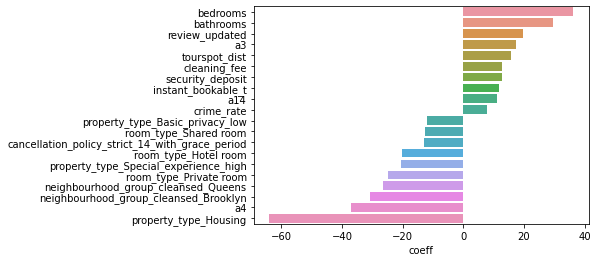

In [ ]:
lasso_coef_high = lasso_coef.sort_values(by='coeff',ascending=False).head(10) 
lasso_coef_low = lasso_coef.sort_values(by='coeff',ascending=False).tail(10)
lasso_coef_concat = pd.concat([lasso_coef_high, lasso_coef_low])
sns.barplot(x=lasso_coef_concat.coeff, y=lasso_coef_concat.index) 

In [ ]:
alpha_lasso = np.arange(0.01, 1, 0.01)
params_lasso = {'alpha' : alpha_lasso}

gs_lasso = GridSearchCV(lasso, param_grid=params_lasso)
gs_lasso.fit(x_train_vif, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])})

In [ ]:
print(gs_lasso.best_params_)

{'alpha': 0.33}


In [ ]:
gs_lasso_pred_vif = gs_lasso.best_estimator_.predict(x_test_vif)

#R^2
r2_gs_lasso = r2_score(y_test, gs_lasso_pred_vif)

#RMSE
mse_gs_lasso_test = mean_squared_error(y_test, gs_lasso_pred_vif)
rmse_gs_lasso_test = mse_gs_lasso_test**(0.5)

#MAE
mae_gs_lasso_test = mean_absolute_error(y_test, gs_lasso_pred_vif)
print('Lasso regression \nR-square : %.6f \nRMSE : %.6f \nMAE : %.6f'%(r2_gs_lasso, rmse_gs_lasso_test,mae_gs_lasso_test))
n = len(x_test_vif)
p = len(x_test_vif.columns)

# adj=R^2
adj_r2_gs_lasso = 1-((n-1)*(1-r2_gs_lasso))/(n-p-1)
print('Adj R-square :', adj_r2_gs_lasso)

Lasso regression 
R-square : 0.096996 
RMSE : 339.844882 
MAE : 95.916275
Adj R-square : 0.09537248566613243


In [ ]:
lasso_best = Lasso(alpha =  0.33)
lasso_best.fit(x_train_vif, y_train)

lasso_best_pred_vif = lasso_best.predict(x_test_vif)

In [ ]:
lasso_best_coef = pd.DataFrame(data=lasso_best.coef_)
lasso_best_coef.index = x_train_vif.columns
lasso_best_coef.columns = ['coeff']
lasso_best_coef['abs_coeff'] = abs(lasso_best_coef['coeff'])
lasso_best_coef.sort_values(ascending = False, by = 'abs_coeff', inplace=True)
lasso_best_coef

,coeff,abs_coeff
property_type_Housing,-66.017504,66.017504
a4,-37.764348,37.764348
bedrooms,36.114007,36.114007
neighbourhood_group_cleansed_Brooklyn,-32.017060,32.017060
bathrooms,29.906707,29.906707
neighbourhood_group_cleansed_Queens,-27.879115,27.879115
room_type_Private room,-25.332178,25.332178
property_type_Special_experience_high,-22.232529,22.232529
room_type_Hotel room,-22.104784,22.104784
review_updated,20.379363,20.379363


<AxesSubplot:xlabel='coeff'>

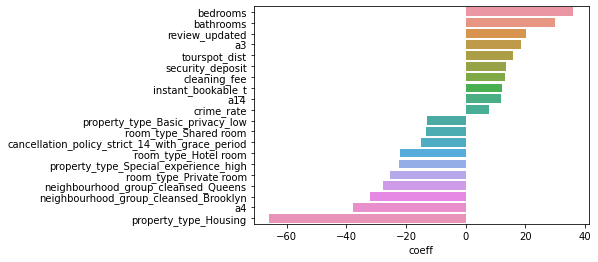

In [ ]:
lasso_best_coef_high = lasso_best_coef.sort_values(by='coeff',ascending=False).head(10) 
lasso_best_coef_low = lasso_best_coef.sort_values(by='coeff',ascending=False).tail(10)
lasso_best_coef_concat = pd.concat([lasso_best_coef_high, lasso_best_coef_low])
sns.barplot(x=lasso_best_coef_concat.coeff, y=lasso_best_coef_concat.index) 

## Random Forest

In [ ]:
rf = RandomForestRegressor() #default-> 'n_estimators' : 100, 'max_features' : auto(n_features)
rf.fit(x_train_vif, y_train)

rf_pred_vif = rf.predict(x_test_vif)

#R^2
r2_rf = r2_score(y_test, rf_pred_vif)

#RMSE
mse_rf_test = mean_squared_error(y_test, rf_pred_vif)
rmse_rf_test = mse_rf_test**(0.5)

#MAE
mae_rf_test = mean_absolute_error(y_test, rf_pred_vif)
print('Random Forest \nR-square : %.6f \nRMSE : %.6f \nMAE : %.6f'%(r2_rf, rmse_rf_test,mae_rf_test))
n = len(x_test_vif)
p = len(x_test_vif.columns)

# adj=R^2
adj_r2_rf = 1-((n-1)*(1-r2_rf))/(n-p-1)
print('Adj R-square :', adj_r2_rf)

Random Forest 
R-square : 0.884575 
RMSE : 121.502752 
MAE : 26.531113
Adj R-square : 0.8843673292967874


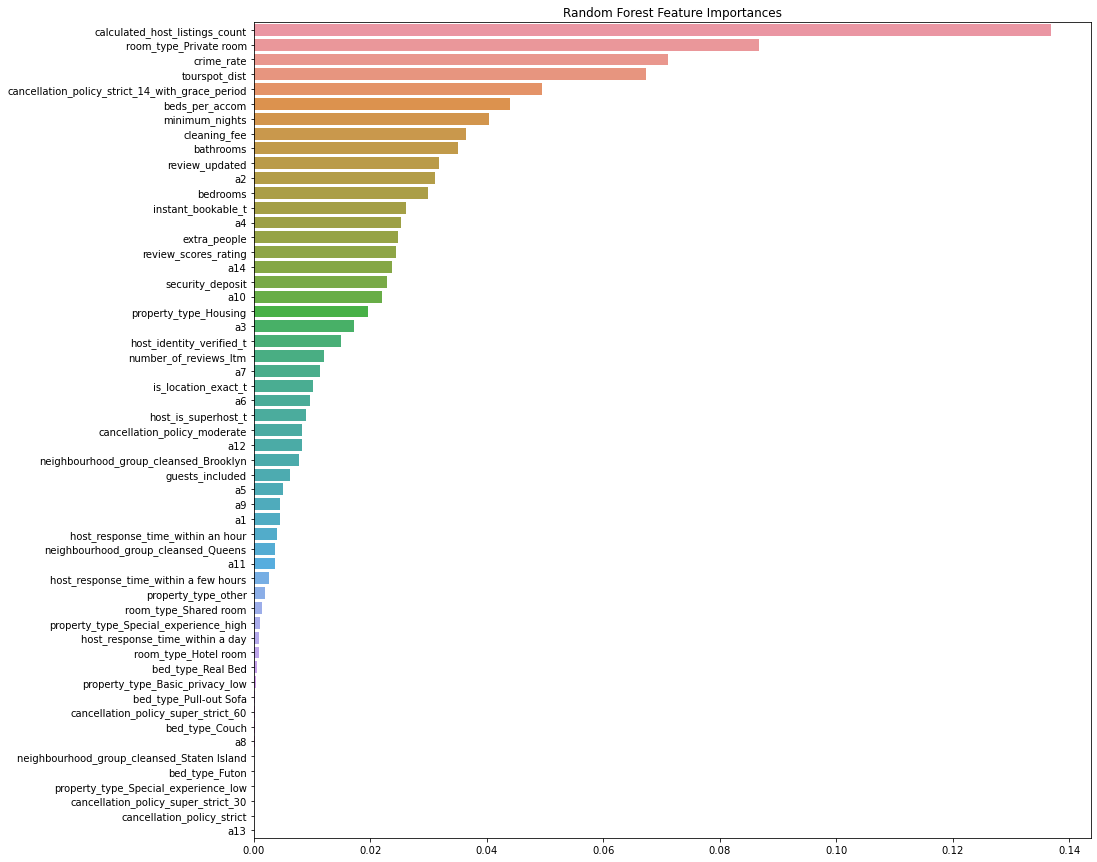

In [ ]:
rf_f = rf.feature_importances_
rf_f_i = pd.Series(rf_f, index=x_train_vif.columns)
rf_f_i = rf_f_i.sort_values(ascending=False)

plt.figure(figsize=(15,15))
plt.title('Random Forest Feature Importances')
sns.barplot(x=rf_f_i, y = rf_f_i.index)
plt.show()

In [ ]:
params_rf = {'n_estimators' : [50 ,100 ,200], 'max_features' : [10, 20, 30]}

rnd_rf = RandomizedSearchCV(rf, param_distributions=params_rf, n_iter=3, random_state=1234)
rnd_rf.fit(x_train_vif, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=3,
                   param_distributions={'max_features': [10, 20, 30],
                                        'n_estimators': [50, 100, 200]},
                   random_state=1234)

In [ ]:
print(rnd_rf.best_params_)

{'n_estimators': 200, 'max_features': 10}


In [ ]:
rnd_rf_pred_vif = rnd_rf.best_estimator_.predict(x_test_vif)

#R^2
r2_rnd_rf = r2_score(y_test, rnd_rf_pred_vif)

#RMSE
mse_rnd_rf_test = mean_squared_error(y_test, rnd_rf_pred_vif)
rmse_rnd_rf_test = mse_rnd_rf_test**(0.5)

#MAE
mae_rnd_rf_test = mean_absolute_error(y_test, rnd_rf_pred_vif)
print('Random Forest \nR-square : %.6f \nRMSE : %.6f \nMAE : %.6f'%(r2_rnd_rf, rmse_rnd_rf_test,mae_rnd_rf_test))
n = len(x_test_vif)
p = len(x_test_vif.columns)

# adj=R^2
adj_r2_rnd_rf = 1-((n-1)*(1-r2_rnd_rf))/(n-p-1)
print('Adj R-square :', adj_r2_rnd_rf)

Random Forest 
R-square : 0.900951 
RMSE : 112.553736 
MAE : 26.158625
Adj R-square : 0.90077338982555


In [ ]:
rf_best = RandomForestRegressor(n_estimators=200, max_features=10)
rf_best.fit(x_train_vif, y_train)

rf_best_pred_vif = rf_best.predict(x_test_vif)

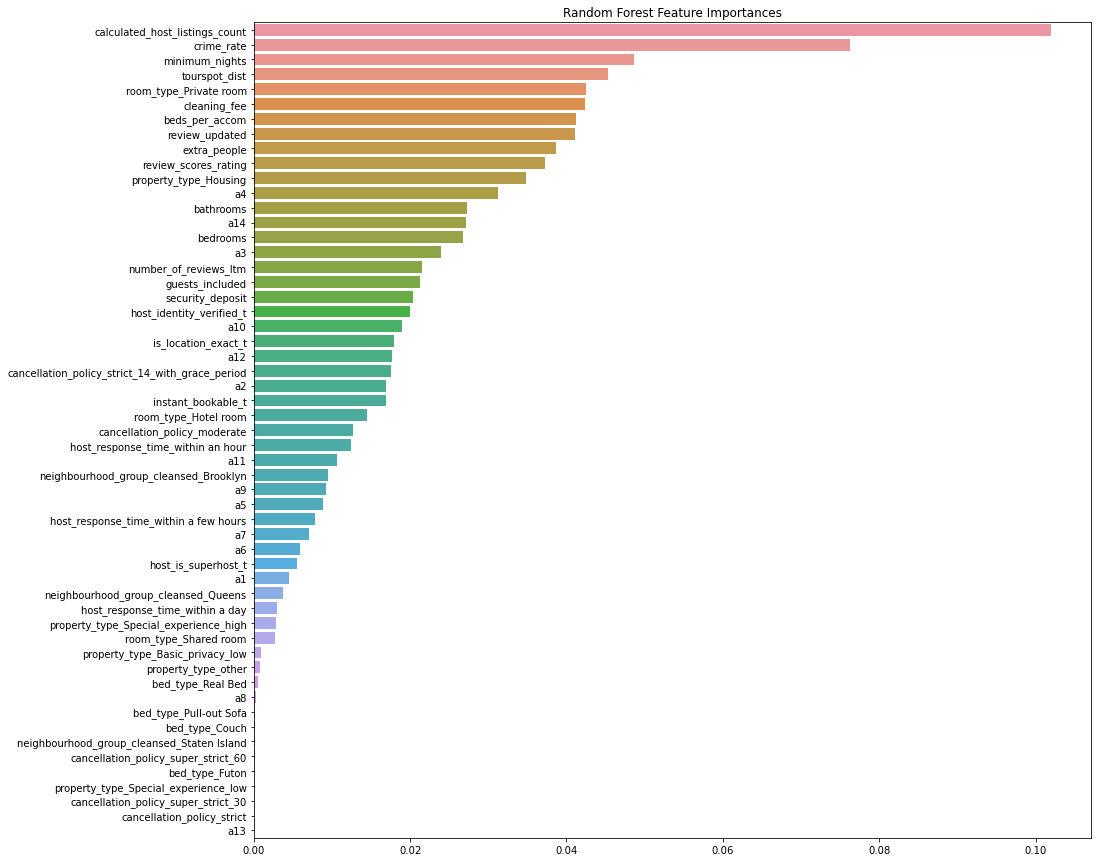

In [ ]:
rf_best_f = rf_best.feature_importances_
rf_best_f_i = pd.Series(rf_best_f, index=x_train_vif.columns)
rf_best_f_i = rf_best_f_i.sort_values(ascending=False)

plt.figure(figsize=(15,15))
plt.title('Random Forest Feature Importances')
sns.barplot(x=rf_best_f_i, y = rf_best_f_i.index)
plt.show()

## Gradient Boost

In [173]:
gb = GradientBoostingRegressor()
gb.fit(x_train_vif, y_train)


gb_pred_vif = gb.predict(x_test_vif) 

mse_gb = mean_squared_error(y_test,gb_pred_vif) 
rmse_gb = np.sqrt(mse_gb) 
r2_gb  = gb.score(x_test_vif, y_test)
mae_gb = mean_absolute_error(y_test,gb_pred_vif)

n = len(x_test_vif)
p = len(x_test_vif.columns)

adj_r2_gb = 1-((n-1)*(1-r2_gb))/(n-p-1)

print('mse : ',mse_gb)
print('rmse : ',rmse_gb)
print('r2 : ',r2_gb)
print('mae : ',mae_gb)
print('r2_adj : ',adj_r2_gb )

mse :  91315.66961066445
rmse :  302.18482690344405
r2 :  0.2860404418033854
mae :  77.41536321153028
r2_adj :  0.2847569714421887


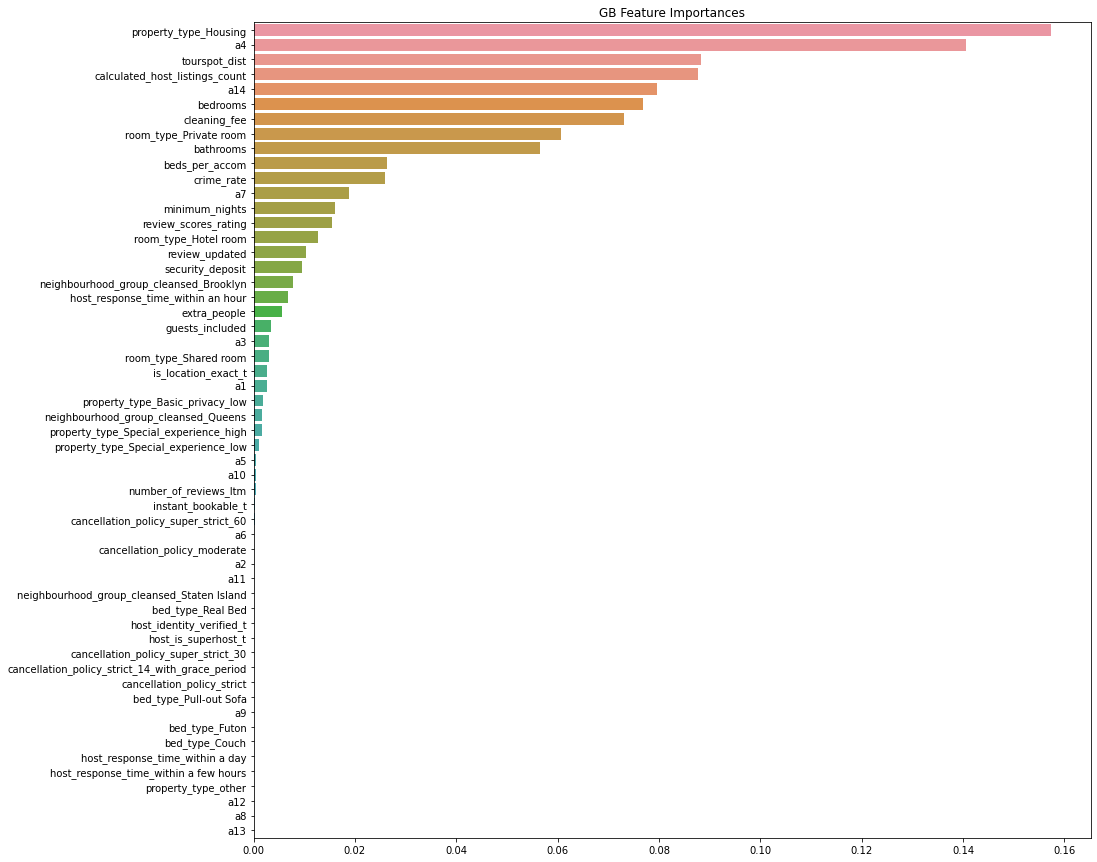

In [174]:
gb_features = gb.feature_importances_
gb_feature_imp = pd.Series(gb_features, index=x_train_vif.columns)
gb_feature_imp = gb_feature_imp.sort_values(ascending=False)

plt.figure(figsize=(15,15))
plt.title('GB Feature Importances')
sns.barplot(x=gb_feature_imp, y = gb_feature_imp.index)
plt.show()

In [175]:
gb_parmas = { 'learning_rate': [0.1, 0.05, 0.01], 'n_estimators': [100,150], 'max_depth': [7, 8]}
parmas = list(product(*gb_parmas.values()))
parmas

[(0.1, 100, 7),
 (0.1, 100, 8),
 (0.1, 150, 7),
 (0.1, 150, 8),
 (0.05, 100, 7),
 (0.05, 100, 8),
 (0.05, 150, 7),
 (0.05, 150, 8),
 (0.01, 100, 7),
 (0.01, 100, 8),
 (0.01, 150, 7),
 (0.01, 150, 8)]

In [176]:
results = pd.DataFrame(columns = ['R2','RMSE','MAE','learning_rate','n_estimators','max_depth'])
for i in parmas : 
    lr = float(i[0])
    n_est = int(i[1])
    max_d = i[2]
    gb = GradientBoostingRegressor(learning_rate= lr, max_depth= max_d , n_estimators = n_est, random_state = 1234)
    gb.fit(x_train_vif, y_train)
    gb_pred_test = gb.predict(x_test_vif)
    gb_r2 = gb.score(x_test_vif, y_test)
    mse_gb = mean_squared_error(y_test, gb_pred_test)
    rmse_gb = np.sqrt(mse_gb)
    mae_gb= mean_absolute_error(y_test, gb_pred_test)
    row = {'R2' : gb_r2, 'RMSE': rmse_gb, 
             'MAE': mae_gb , 'learning_rate':lr ,'n_estimators' : n_est,'max_depth' : max_d }
    results = results.append(row, ignore_index = True)

results

,R2,RMSE,MAE,learning_rate,n_estimators,max_depth
0,0.769526,171.690555,53.462439,0.10,100.0,7.0
1,0.832252,146.475373,48.912723,0.10,100.0,8.0
2,0.802413,158.970118,51.606927,0.10,150.0,7.0
3,0.849607,138.691620,47.015777,0.10,150.0,8.0
4,0.712768,191.669291,56.290031,0.05,100.0,7.0
5,0.790014,163.882009,52.070346,0.05,100.0,8.0
6,0.743711,181.051042,54.632267,0.05,150.0,7.0
7,0.816026,153.396126,50.170830,0.05,150.0,8.0
8,0.479945,257.905399,73.985515,0.01,100.0,7.0
9,0.562860,236.453699,71.216579,0.01,100.0,8.0


In [177]:
results[results['R2'] == results['R2'].max()]

,R2,RMSE,MAE,learning_rate,n_estimators,max_depth
3,0.849607,138.69162,47.015777,0.1,150.0,8.0


In [178]:
gb = GradientBoostingRegressor(learning_rate = 0.1,n_estimators = 150, max_depth = 8)
gb.fit(x_train_vif, y_train)


gb_pred_vif = gb.predict(x_test_vif) 

mse_gb = mean_squared_error(y_test,gb_pred_vif) 
rmse_gb = np.sqrt(mse_gb) 
r2_gb  = gb.score(x_test_vif, y_test)
mae_gb = mean_absolute_error(y_test,gb_pred_vif)

n = len(x_test_vif)
p = len(x_test_vif.columns)

adj_r2_gb = 1-((n-1)*(1-r2_gb))/(n-p-1)

print('mse : ',mse_gb)
print('rmse : ',rmse_gb)
print('r2 : ',r2_gb)
print('mae : ',mae_gb)
print('r2_adj : ',adj_r2_gb)

mse :  19104.871401767683
rmse :  138.22037260030694
r2 :  0.8506268901759637
mae :  47.000275648229334
r2_adj :  0.8503583652195877


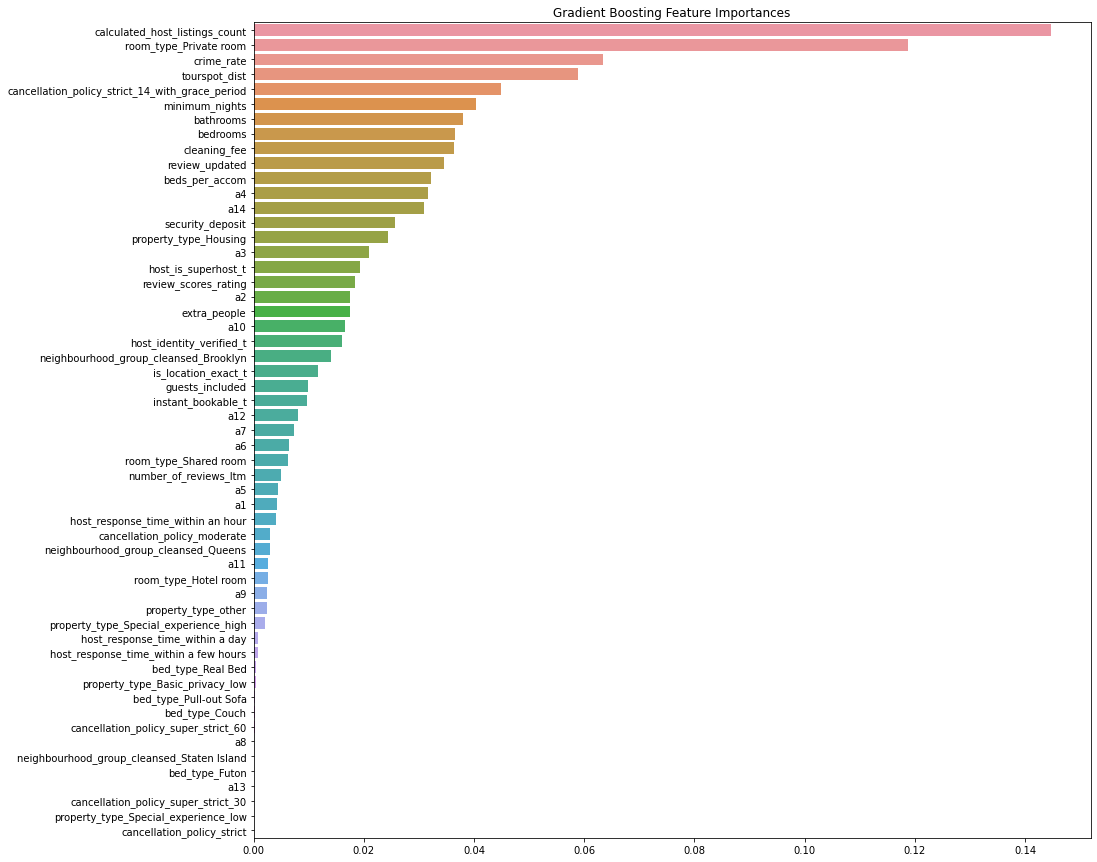

In [179]:
gb_features = gb.feature_importances_
gb_feature_imp = pd.Series(gb_features, index=x_train_vif.columns)
gb_feature_imp = gb_feature_imp.sort_values(ascending=False)

plt.figure(figsize=(15,15))
plt.title('Gradient Boosting Feature Importances')
sns.barplot(x=gb_feature_imp, y = gb_feature_imp.index)
plt.show()

## XGBoost

In [ ]:
# 튜닝 전
xgb = XGBRegressor()
xgb.fit(x_train_vif, y_train)

[16:38:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# 튜닝 전
xgb.fit(x_test_vif, y_test)

n = len(x_test_vif)
p = len(x_test_vif.columns)

# drop 'host_response_rate'
xgb_pred_test = xgb.predict(x_test_vif)
r2_xgb = xgb.score(x_test_vif, y_test)

#RMSE_test
mse_xgb_test = mean_squared_error(y_test, xgb_pred_test)
rmse_xgb_test = mse_xgb_test**(0.5)
#MAE_test
mae_xgb_test = mean_absolute_error(y_test, xgb_pred_test)
print('r-square', r2_xgb)
print('rmse', rmse_xgb_test)
print('mae', mae_xgb_test)

# adj=R^2
adj_r2_xgb = 1-((n-1)*(1-r2_xgb))/(n-p-1)
print('adj r2', adj_r2_xgb)

[16:38:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r-square 0.30571704855078996
rmse 297.99165245851833
mae 72.39884707921462
adj r2 0.30446895041940547


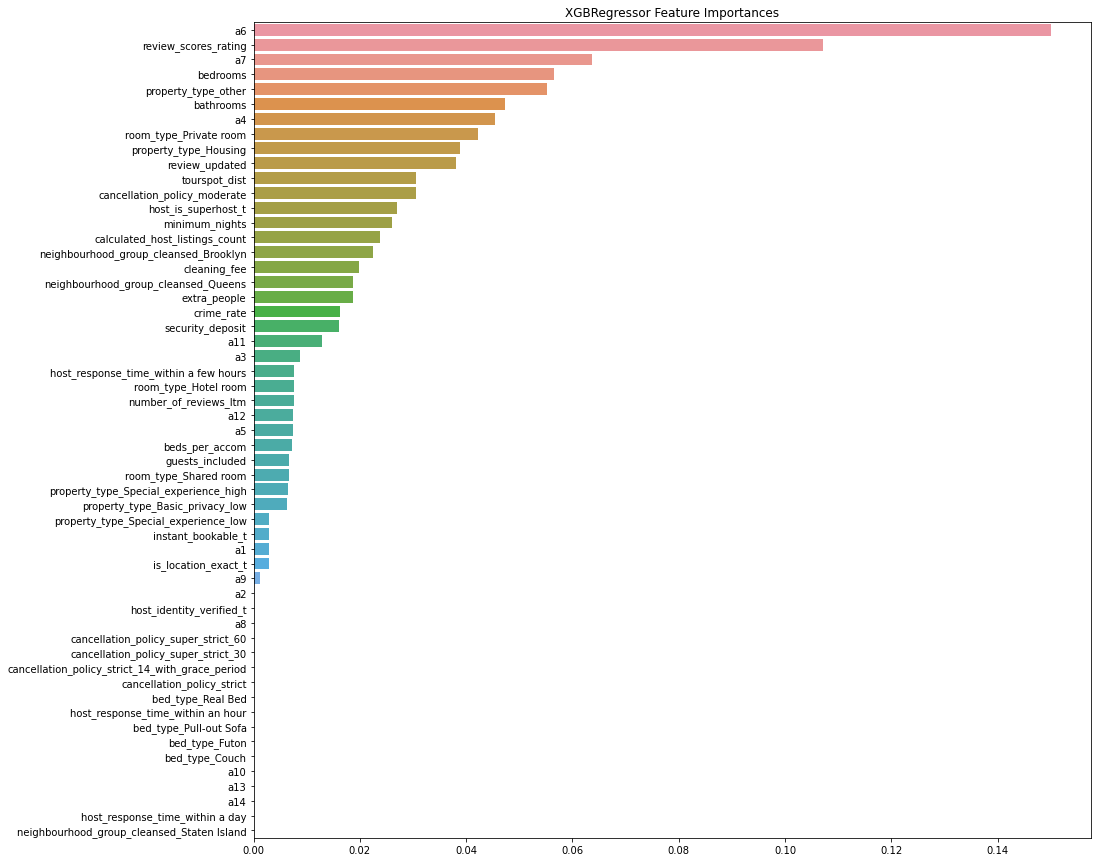

In [ ]:
xgb_f = xgb.feature_importances_
xgb_f_i = pd.Series(xgb_f, index=x_train_vif.columns)
xgb_f_i = xgb_f_i.sort_values(ascending=False)

plt.figure(figsize=(15,15))
plt.title('XGBRegressor Feature Importances')
sns.barplot(x=xgb_f_i, y = xgb_f_i.index)
plt.show()

In [ ]:
# 사용한 하이퍼 파라미터
# 하이퍼 파라미터 조정
params = {
    'n_estimators': [500, 1000], 
    'learning_rate': [0.1, 0.05, 0.01], 
    'max_depth': [7, 8], 
    'colsample_bytree': [0.8, 0.9], 
    'subsample': [0.8, 0.9,],
    'n_jobs':[-1, 1, 2, 3, 4]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
clf = RandomizedSearchCV(XGBRegressor(), params, random_state=1234, cv=3, n_iter=5, scoring='neg_mean_squared_error')

In [ ]:
clf.fit(x_train_vif, y_train)

[16:39:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:50:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:55:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:59:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:03:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(cv=3, estimator=XGBRegressor(), n_iter=5,
                   param_distributions={'colsample_bytree': [0.8, 0.9],
                                        'learning_rate': [0.1, 0.05, 0.01],
                                        'max_depth': [7, 8],
                                        'n_estimators': [500, 1000],
                                        'n_jobs': [-1, 1, 2, 3, 4],
                                        'subsample': [0.8, 0.9]},
                   random_state=1234, scoring='neg_mean_squared_error')

In [ ]:
clf.best_score_

-41350.877643907654

In [ ]:
clf.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 1000,
 'n_jobs': -1,
 'subsample': 0.9}

In [ ]:
#clf.best_params_
{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 1000,
 'n_jobs': -1,
 'subsample': 0.9}

**RandomizedSearchCV로 구한 최적의 하이퍼마라미터를 적용해서 구해줬다.**

In [ ]:
# 튜닝 후
xgb = XGBRegressor(n_estimators=1000, colsample_bytree=0.8, min_child_weight=5, max_depth=8, learning_rate=0.1, 
                               n_jobs=-1, subsample=0.9, random_state= 1234, objective = 'reg:squarederror')
xgb.fit(x_test_vif, y_test)

XGBRegressor(colsample_bytree=0.8, max_depth=8, min_child_weight=5,
             n_estimators=1000, n_jobs=-1, objective='reg:squarederror',
             random_state=1234, subsample=0.9)

In [ ]:
xgb_pred_test = xgb.predict(x_test_vif)
r2_xgb = xgb.score(x_test_vif, y_test)

#RMSE_test
mse_xgb_test = mean_squared_error(y_test, xgb_pred_test)
rmse_xgb_test = mse_xgb_test**(0.5)
#MAE_test
mae_xgb_test = mean_absolute_error(y_test, xgb_pred_test)
print('r-square', r2_xgb)
print('rmse', rmse_xgb_test)
print('mae', mae_xgb_test)

# adj=R^2
adj_r2_xgb = 1-((n-1)*(1-r2_xgb))/(n-p-1)
print('adj r2', adj_r2_xgb)

r-square 0.9895697963252937
rmse 36.524328701238744
mae 18.084507910062865
adj r2 0.9895510461634337


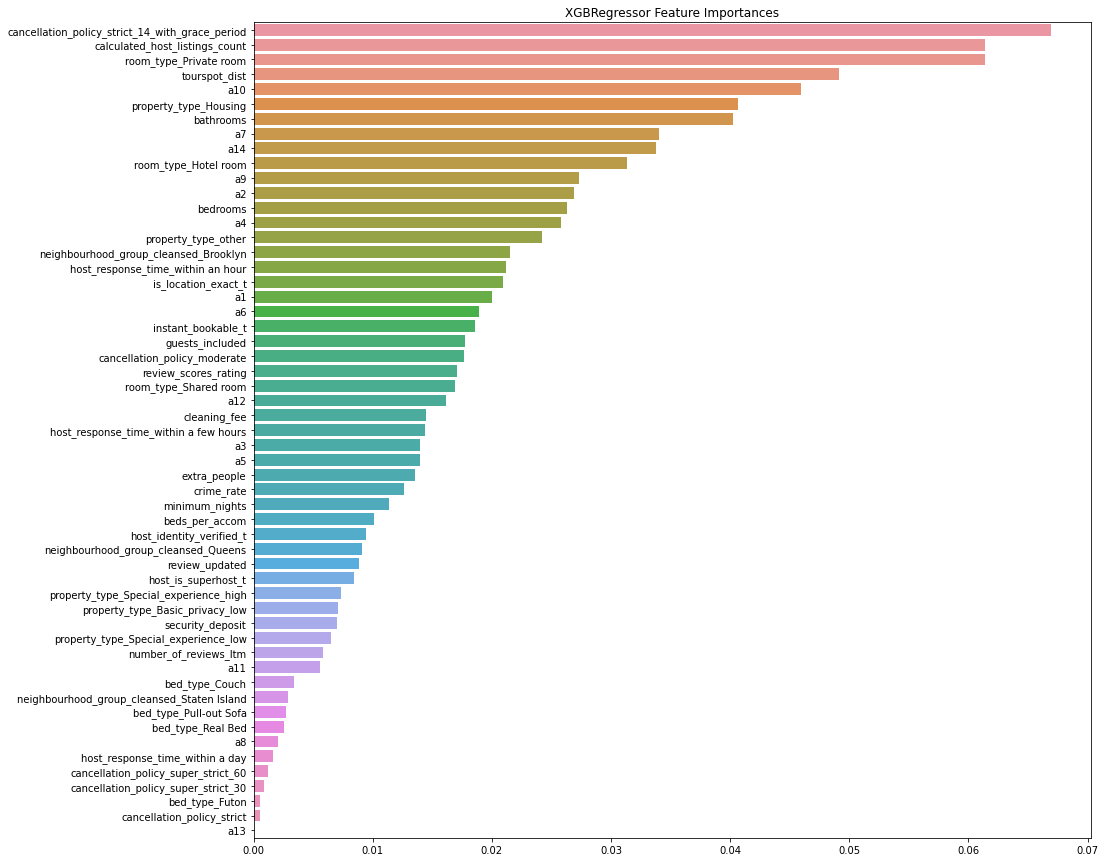

In [ ]:
xgb_f = xgb.feature_importances_
xgb_f_i = pd.Series(xgb_f, index=x_train_vif.columns)
xgb_f_i = xgb_f_i.sort_values(ascending=False)

plt.figure(figsize=(15,15))
plt.title('XGBRegressor Feature Importances')
sns.barplot(x=xgb_f_i, y = xgb_f_i.index)
plt.show()

# 10. 'price' > log 변환 후 모델링

In [180]:
y_train_log = np.log(y_train+1)
y_test_log = np.log(y_test+1)

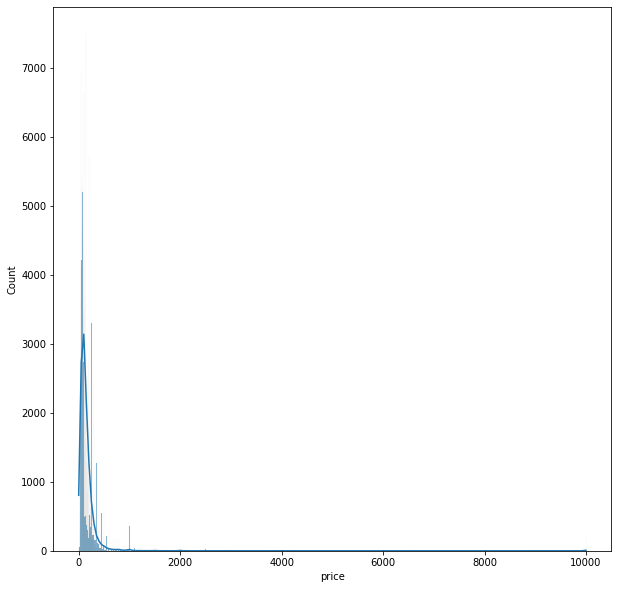

In [198]:
plt.figure(figsize=(10,10))
sns.histplot(df['price'], kde = True)

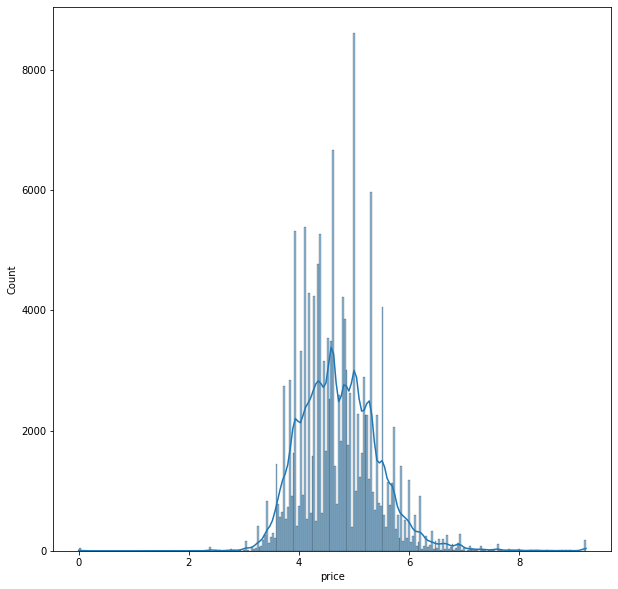

In [199]:
y_log = np.log(y+1)
plt.figure(figsize=(10,10))
sns.histplot(y_log, kde = True)

## Linear Regression

In [ ]:
lr.fit(x_train_vif, y_train_log) 

LinearRegression()

In [ ]:
lr.intercept_

4.7351969755504

**y_log시 x변수들의 계수**

In [ ]:
lin_coeff = pd.DataFrame()
lin_coeff['var'] = x_train_vif.columns
lin_coeff['coeff'] = lr.coef_
lin_coeff.sort_values(ascending = False, by = 'coeff', inplace=True)
lin_coeff

,var,coeff
1,bedrooms,0.125856
3,cleaning_fee,0.081863
10,review_updated,0.051952
13,a3,0.047896
0,bathrooms,0.046510
4,guests_included,0.037816
21,a11,0.028899
27,tourspot_dist,0.027790
12,a2,0.020534
11,a1,0.017652


In [ ]:
lr_pred_vif = lr.predict(x_test_vif)

#R^2
r2_lr = lr.score(x_test_vif, y_test_log)

#RMSE
mse_lr_test = mean_squared_error(y_test_log, lr_pred_vif)
rmse_lr_test = mse_lr_test**(0.5)

#MAE
mae_lr_test = mean_absolute_error(y_test_log, lr_pred_vif)
print('linear regression \nR-square : %.6f \nRMSE : %.6f \nMAE : %.6f'%(r2_lr, rmse_lr_test,mae_lr_test))
n = len(x_test_vif)
p = len(x_test_vif.columns)

# adj=R^2
adj_r2_lr = 1-((n-1)*(1-r2_lr))/(n-p-1)
print('adj r2', adj_r2_lr)

linear regression 
R-square : 0.541720 
RMSE : 0.482868 
MAE : 0.337704
adj r2 0.5408962311305958


## Ridge Regression

In [200]:
ridge = Ridge() #파라메타 설정 없이 먼저 해보기 
ridge.fit(x_train_vif, y_train_log )

rdg_pred_vif = ridge.predict(x_test_vif) 

mse_rdg = mean_squared_error(y_test_log,rdg_pred_vif) 
rmse_rdg = np.sqrt(mse_rdg) 
r2_rdg  = ridge.score(x_test_vif, y_test_log)
mae_rdg = mean_absolute_error(y_test_log,rdg_pred_vif)

n = len(x_test_vif)
p = len(x_test_vif.columns)

adj_r2_rdg = 1-((n-1)*(1-r2_rdg))/(n-p-1)

print('mse : ',mse_rdg)
print('rmse : ',rmse_rdg)
print('r2 : ',r2_rdg)
print('mae : ',mae_rdg)
print('adj_r2', adj_r2_rdg)

mse :  0.23316132688947455
rmse :  0.4828678151310921
r2 :  0.5417200760634473
mae :  0.3377041983406933
adj_r2 0.5408962357033718


In [201]:
ridge_coef = pd.DataFrame(data=ridge.coef_)
ridge_coef.index = x_train_vif.columns
ridge_coef.columns = ['coeff']
ridge_coef['abs_coeff'] = abs(ridge_coef['coeff'])
ridge_coef.sort_values(ascending = False, by = 'abs_coeff', inplace=True)
ridge_coef

,coeff,abs_coeff
room_type_Private room,-0.292404,0.292404
neighbourhood_group_cleansed_Brooklyn,-0.145092,0.145092
room_type_Shared room,-0.142831,0.142831
bedrooms,0.125855,0.125855
neighbourhood_group_cleansed_Queens,-0.122514,0.122514
property_type_Housing,-0.083832,0.083832
cleaning_fee,0.081864,0.081864
review_updated,0.051952,0.051952
beds_per_accom,-0.049667,0.049667
a3,0.047896,0.047896


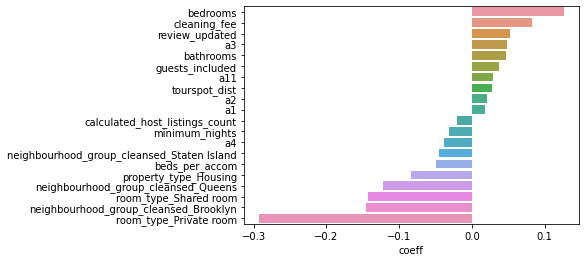

In [202]:
ridge_coef_high = ridge_coef.sort_values(by='coeff',ascending=False).head(10) 
ridge_coef_low = ridge_coef.sort_values(by='coeff',ascending=False).tail(10)
ridge_coef_concat = pd.concat([ridge_coef_high, ridge_coef_low])
sns.barplot(x=ridge_coef_concat.coeff, y=ridge_coef_concat.index) 

In [203]:
params = {'alpha' : np.arange(0, 101, 1) }
gridsearch = GridSearchCV(ridge, param_grid = params)

gridsearch.fit(x_train_vif, y_train_log)

ridge_estimator = gridsearch.best_estimator_
y_pred = ridge_estimator.predict(x_test_vif)

print(gridsearch.best_params_)
print(ridge_estimator.score(x_test_vif,y_test_log))

{'alpha': 100}
0.5417201741761737


In [204]:
for a in (np.arange(0, 101, 10) ):
    ridge = Ridge(alpha=a)
    ridge.fit(x_train_vif, y_train)
    ridge_pred_vif = ridge.predict(x_test_vif)
    r2_rdg = ridge.score(x_test_vif, y_test)
    print('alpha=',a,':', 'R-square=', r2_rdg)

alpha= 0 : R-square= 0.09639114585604591
alpha= 10 : R-square= 0.09639447283607172
alpha= 20 : R-square= 0.09639779605104859
alpha= 30 : R-square= 0.09640111550475494
alpha= 40 : R-square= 0.0964044312009642
alpha= 50 : R-square= 0.09640774314344547
alpha= 60 : R-square= 0.09641105133596228
alpha= 70 : R-square= 0.09641435578227309
alpha= 80 : R-square= 0.09641765648613254
alpha= 90 : R-square= 0.09642095345128876
alpha= 100 : R-square= 0.0964242466814863


In [205]:
ridge = Ridge(alpha= 100 ) 
ridge.fit(x_train_vif, y_train_log)

rdg_pred_vif = ridge.predict(x_test_vif) 

mse_rdg = mean_squared_error(y_test_log,rdg_pred_vif) 
rmse_rdg = np.sqrt(mse_rdg) 
r2_rdg  = ridge.score(x_test_vif, y_test_log)
mae_rdg = mean_absolute_error(y_test_log,rdg_pred_vif)

n = len(x_test_vif)
p = len(x_test_vif.columns)

adj_r2_rdg = 1-((n-1)*(1-r2_rdg))/(n-p-1)

print('mse : ',mse_rdg)
print('rmse : ',rmse_rdg)
print('r2 : ',r2_rdg)
print('mae : ',mae_rdg)
print('adj_r2', adj_r2_rdg)

mse :  0.2331612769721811
rmse :  0.4828677634427267
r2 :  0.5417201741761737
mae :  0.33770709756456185
adj_r2 0.5408963339924734


In [206]:
ridge_coef = pd.DataFrame(data=ridge.coef_)
ridge_coef.index = x_train_vif.columns
ridge_coef.columns = ['coeff']
ridge_coef['abs_coeff'] = abs(ridge_coef['coeff'])
ridge_coef.sort_values(ascending = False, by = 'abs_coeff', inplace=True)
ridge_coef
#alpha 값을 높이니 계수가 줄어듬

,coeff,abs_coeff
room_type_Private room,-0.292057,0.292057
neighbourhood_group_cleansed_Brooklyn,-0.144812,0.144812
room_type_Shared room,-0.142642,0.142642
bedrooms,0.125757,0.125757
neighbourhood_group_cleansed_Queens,-0.122246,0.122246
property_type_Housing,-0.083732,0.083732
cleaning_fee,0.081938,0.081938
review_updated,0.051905,0.051905
beds_per_accom,-0.049710,0.049710
a3,0.047861,0.047861


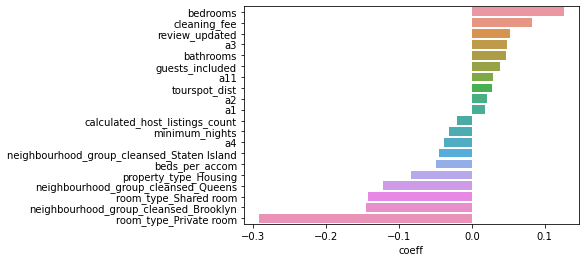

In [207]:
ridge_coef_high = ridge_coef.sort_values(by='coeff',ascending=False).head(10) 
ridge_coef_low = ridge_coef.sort_values(by='coeff',ascending=False).tail(10)
ridge_coef_concat = pd.concat([ridge_coef_high, ridge_coef_low])
sns.barplot(x=ridge_coef_concat.coeff, y=ridge_coef_concat.index) 

## Lasso Regression

In [ ]:
lasso = Lasso()
lasso.fit(x_train_vif, y_train_log)

lasso_pred_vif = lasso.predict(x_test_vif)

#R^2
r2_lasso = r2_score(y_test_log, lasso_pred_vif)

#RMSE
mse_lasso_test = mean_squared_error(y_test_log, lasso_pred_vif)
rmse_lasso_test = mse_lasso_test**(0.5)

#MAE
mae_lasso_test = mean_absolute_error(y_test_log, lasso_pred_vif)
print('Lasso regression \nR-square : %.6f \nRMSE : %.6f \nMAE : %.6f'%(r2_lasso, rmse_lasso_test,mae_lasso_test))
n = len(x_test_vif)
p = len(x_test_vif.columns)

# adj=R^2
adj_r2_lasso = 1-((n-1)*(1-r2_lasso))/(n-p-1)
print('Adj R-square :', adj_r2_lasso)

Lasso regression 
R-square : -0.000000 
RMSE : 0.713285 
MAE : 0.555631
Adj R-square : -0.0017979230299907112


In [ ]:
lasso_coef = pd.DataFrame(data=lasso.coef_)
lasso_coef.index = x_train_vif.columns
lasso_coef.columns = ['coeff']
lasso_coef['abs_coeff'] = abs(lasso_coef['coeff'])
lasso_coef.sort_values(ascending = False, by = 'abs_coeff', inplace=True)
lasso_coef

,coeff,abs_coeff
bathrooms,0.0,0.0
room_type_Shared room,-0.0,0.0
host_response_time_within an hour,0.0,0.0
neighbourhood_group_cleansed_Brooklyn,-0.0,0.0
neighbourhood_group_cleansed_Queens,-0.0,0.0
neighbourhood_group_cleansed_Staten Island,-0.0,0.0
property_type_Basic_privacy_low,-0.0,0.0
property_type_Housing,-0.0,0.0
property_type_Special_experience_high,0.0,0.0
property_type_Special_experience_low,-0.0,0.0


In [ ]:
alpha_lasso = np.arange(0.01, 1, 0.01)
params_lasso = {'alpha' : alpha_lasso }

gs_lasso = GridSearchCV(lasso, param_grid=params_lasso)
gs_lasso.fit(x_train_vif, y_train_log)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])})

In [ ]:
print(gs_lasso.best_params_)

{'alpha': 0.01}


In [ ]:
gs_lasso_pred_vif = gs_lasso.best_estimator_.predict(x_test_vif)

#R^2
r2_gs_lasso = r2_score(y_test_log, gs_lasso_pred_vif)

#RMSE
mse_gs_lasso_test = mean_squared_error(y_test_log, gs_lasso_pred_vif)
rmse_gs_lasso_test = mse_gs_lasso_test**(0.5)

#MAE
mae_gs_lasso_test = mean_absolute_error(y_test_log, gs_lasso_pred_vif)
print('Lasso regression \nR-square : %.6f \nRMSE : %.6f \nMAE : %.6f'%(r2_gs_lasso, rmse_gs_lasso_test,mae_gs_lasso_test))
n = len(x_test_vif)
p = len(x_test_vif.columns)

# adj=R^2
adj_r2_gs_lasso = 1-((n-1)*(1-r2_gs_lasso))/(n-p-1)
print('Adj R-square :', adj_r2_gs_lasso)

Lasso regression 
R-square : 0.535680 
RMSE : 0.486039 
MAE : 0.339339
Adj R-square : 0.5348454848955735


In [ ]:
lasso_best = Lasso(alpha = 0.01)
lasso_best.fit(x_train_vif, y_train_log)

lasso_best_pred_vif = lasso_best.predict(x_test_vif)

In [ ]:
lasso_best_coef = pd.DataFrame(data=lasso_best.coef_)
lasso_best_coef.index = x_train_vif.columns
lasso_best_coef.columns = ['coeff']
lasso_best_coef['abs_coeff'] = abs(lasso_best_coef['coeff'])
lasso_best_coef.sort_values(ascending = False, by = 'abs_coeff', inplace=True)
lasso_best_coef

,coeff,abs_coeff
room_type_Private room,-0.288446,0.288446
room_type_Shared room,-0.134102,0.134102
neighbourhood_group_cleansed_Brooklyn,-0.128569,0.128569
bedrooms,0.123392,0.123392
neighbourhood_group_cleansed_Queens,-0.109401,0.109401
cleaning_fee,0.077705,0.077705
property_type_Housing,-0.070074,0.070074
review_updated,0.045380,0.045380
beds_per_accom,-0.043961,0.043961
bathrooms,0.039508,0.039508


<AxesSubplot:xlabel='coeff'>

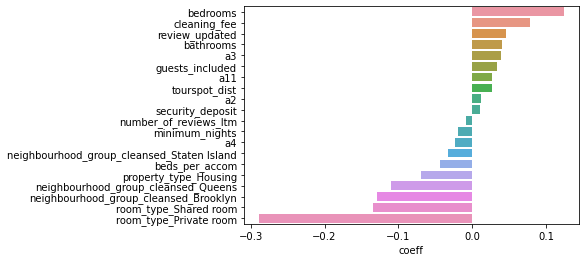

In [ ]:
lasso_best_coef_high = lasso_best_coef.sort_values(by='coeff',ascending=False).head(10) 
lasso_best_coef_low = lasso_best_coef.sort_values(by='coeff',ascending=False).tail(10)
lasso_best_coef_concat = pd.concat([lasso_best_coef_high, lasso_best_coef_low])
sns.barplot(x=lasso_best_coef_concat.coeff, y=lasso_best_coef_concat.index) 

## Random Forest

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train_vif, y_train_log)

rf_pred_vif = rf.predict(x_test_vif)

#R^2
r2_rf = r2_score(y_test_log, rf_pred_vif)

#RMSE
mse_rf_test = mean_squared_error(y_test_log, rf_pred_vif)
rmse_rf_test = mse_rf_test**(0.5)

#MAE
mae_rf_test = mean_absolute_error(y_test_log, rf_pred_vif)
print('Random Forest \nR-square : %.6f \nRMSE : %.6f \nMAE : %.6f'%(r2_rf, rmse_rf_test,mae_rf_test))
n = len(x_test_vif)
p = len(x_test_vif.columns)

# adj=R^2
adj_r2_rf = 1-((n-1)*(1-r2_rf))/(n-p-1)
print('Adj R-square :', adj_r2_rf)

Random Forest 
R-square : 0.908436 
RMSE : 0.215836 
MAE : 0.122532
Adj R-square : 0.9082717003946108


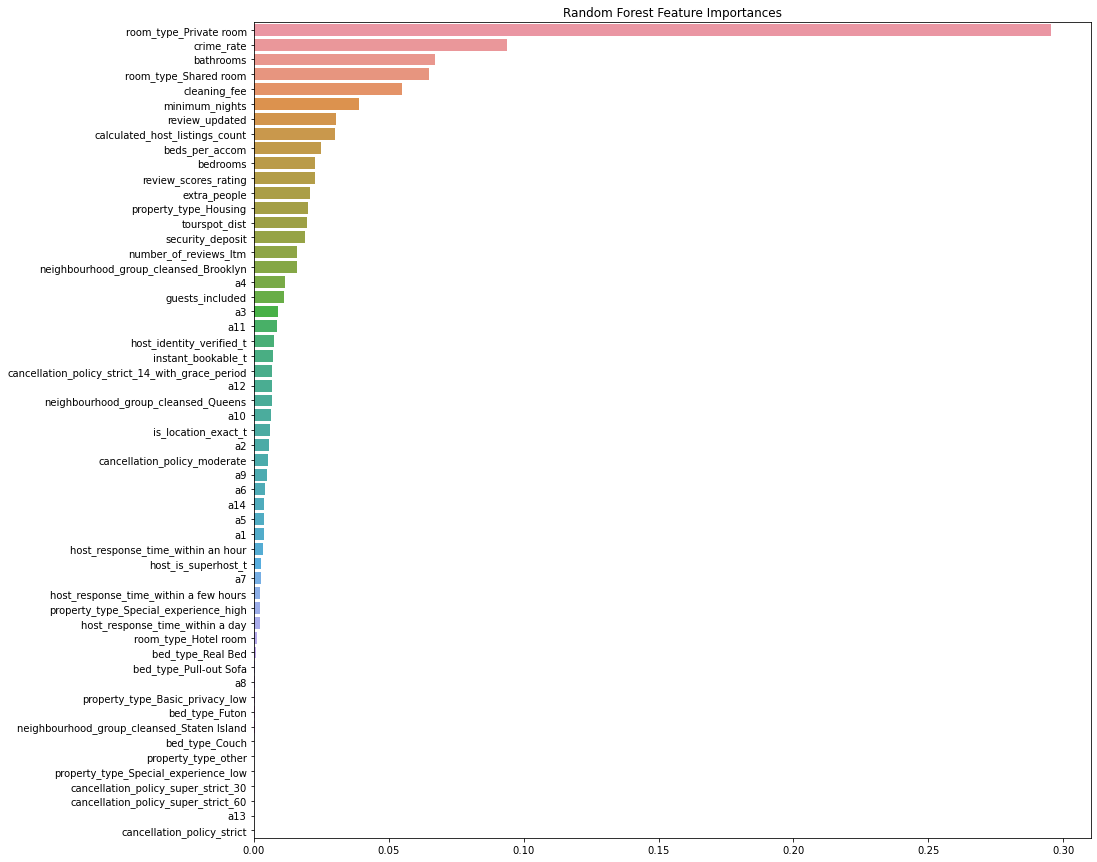

In [ ]:
rf_f = rf.feature_importances_
rf_f_i = pd.Series(rf_f, index=x_train_vif.columns)
rf_f_i = rf_f_i.sort_values(ascending=False)

plt.figure(figsize=(15,15))
plt.title('Random Forest Feature Importances')
sns.barplot(x=rf_f_i, y = rf_f_i.index)
plt.show()

In [ ]:
params_rf = {'n_estimators' : [50 ,100 ,200], 'max_features' : [10, 20, 30]}

rnd_rf = RandomizedSearchCV(rf, param_distributions=params_rf, n_iter=3, random_state=1234)
rnd_rf.fit(x_train_vif, y_train_log)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=3,
                   param_distributions={'max_features': [10, 20, 30],
                                        'n_estimators': [50, 100, 200]},
                   random_state=1234)

In [ ]:
print(rnd_rf.best_params_)

{'n_estimators': 200, 'max_features': 30}


In [ ]:
rnd_rf_pred_vif = rnd_rf.best_estimator_.predict(x_test_vif)

#R^2
r2_rnd_rf = r2_score(y_test_log, rnd_rf_pred_vif)

#RMSE
mse_rnd_rf_test = mean_squared_error(y_test_log, rnd_rf_pred_vif)
rmse_rnd_rf_test = mse_rnd_rf_test**(0.5)

#MAE
mae_rnd_rf_test = mean_absolute_error(y_test_log, rnd_rf_pred_vif)
print('Random Forest \nR-square : %.6f \nRMSE : %.6f \nMAE : %.6f'%(r2_rnd_rf, rmse_rnd_rf_test,mae_rnd_rf_test))
n = len(x_test_vif)
p = len(x_test_vif.columns)

# adj=R^2
adj_r2_rnd_rf = 1-((n-1)*(1-r2_rnd_rf))/(n-p-1)
print('Adj R-square :', adj_r2_rnd_rf)

Random Forest 
R-square : 0.913981 
RMSE : 0.209199 
MAE : 0.119518
Adj R-square : 0.9138267328667817


In [ ]:
rf_best = RandomForestRegressor(n_estimators=200, max_features=30)
rf_best.fit(x_train_vif, y_train_log)

rf_best_pred_vif = rf_best.predict(x_test_vif)

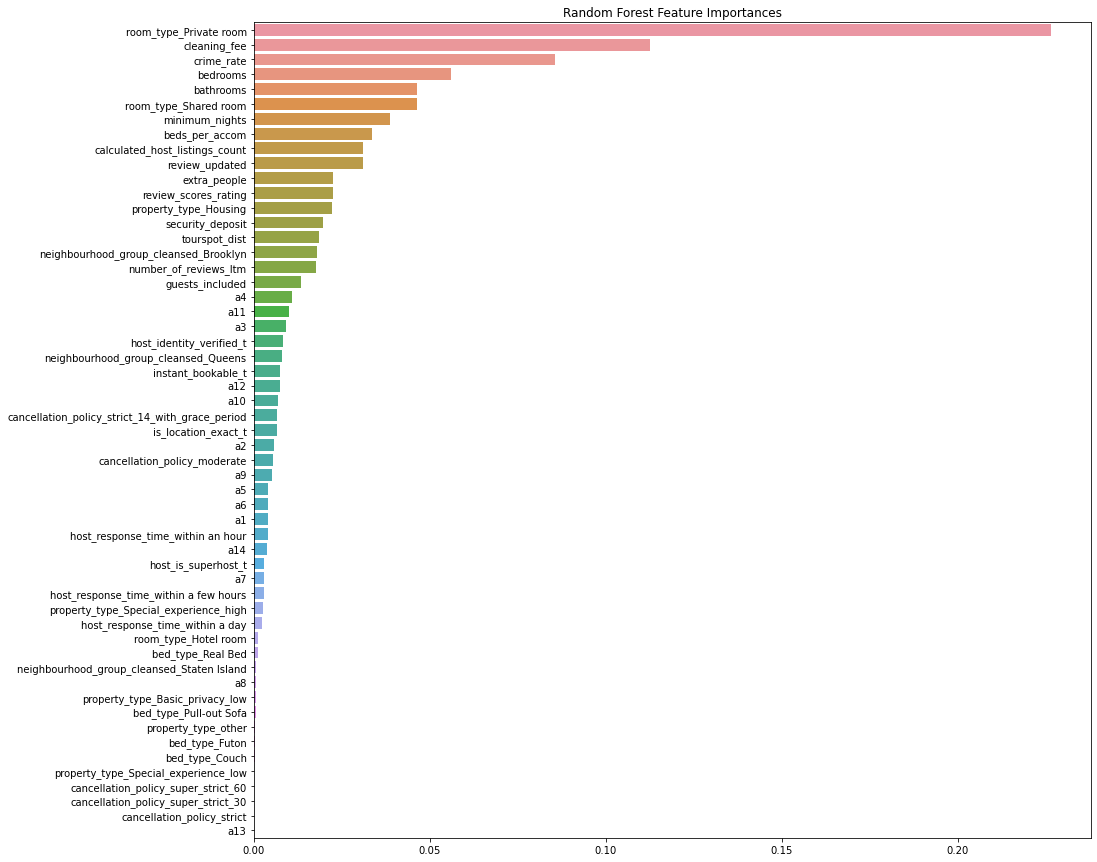

In [ ]:
rf_best_f = rf_best.feature_importances_
rf_best_f_i = pd.Series(rf_best_f, index=x_train_vif.columns)
rf_best_f_i = rf_best_f_i.sort_values(ascending=False)

plt.figure(figsize=(15,15))
plt.title('Random Forest Feature Importances')
sns.barplot(x=rf_best_f_i, y = rf_best_f_i.index)
plt.show()

## Gradient Boost

In [209]:
gb = GradientBoostingRegressor()
gb.fit(x_train_vif, y_train_log)


gb_pred_vif = gb.predict(x_test_vif) 

mse_gb = mean_squared_error(y_test_log,gb_pred_vif) 
rmse_gb = np.sqrt(mse_gb) 
r2_gb  = gb.score(x_test_vif, y_test_log)
mae_gb = mean_absolute_error(y_test_log,gb_pred_vif)

n = len(x_test_vif)
p = len(x_test_vif.columns)

adj_r2_gb = 1-((n-1)*(1-r2_gb))/(n-p-1)

print('mse : ',mse_gb)
print('rmse : ',rmse_gb)
print('r2 : ',r2_gb)
print('mae : ',mae_gb)
print('r2_adj : ',adj_r2_gb )

mse :  0.18860341226390365
rmse :  0.43428494363022035
r2 :  0.6292989125617391
mae :  0.2961347918111334
r2_adj :  0.6286325108683544


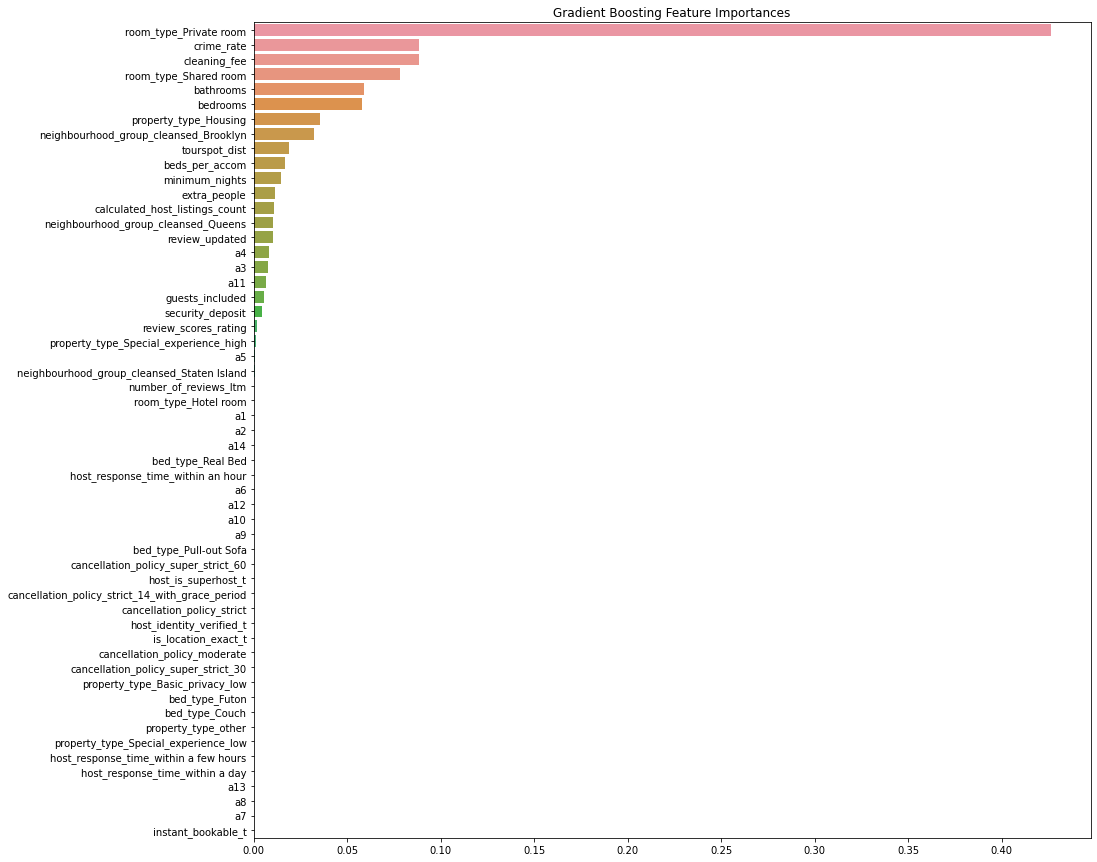

In [210]:
gb_features = gb.feature_importances_
gb_feature_imp = pd.Series(gb_features, index=x_train_vif.columns)
gb_feature_imp = gb_feature_imp.sort_values(ascending=False)

plt.figure(figsize=(15,15))
plt.title('Gradient Boosting Feature Importances')
sns.barplot(x=gb_feature_imp, y = gb_feature_imp.index)
plt.show()

In [211]:
gb_parmas = {'learning_rate': [0.1, 0.05, 0.01], 'n_estimators': [100,150], 'max_depth': [7, 8]}
parmas = list(product(*gb_parmas.values()))

In [212]:
results = pd.DataFrame(columns = ['R2','RMSE','MAE','learning_rate','n_estimators','max_depth'])
for i in parmas : 
    lr = float(i[0])
    n_est = int(i[1])
    max_d = i[2]
    gb = GradientBoostingRegressor(learning_rate= lr, max_depth= max_d , n_estimators = n_est, random_state = 1234)
    gb.fit(x_train_vif, y_train_log)
    gb_pred_test = gb.predict(x_test_vif)
    gb_r2 = gb.score(x_test_vif, y_test_log)
    mse_gb = mean_squared_error(y_test_log, gb_pred_test)
    rmse_gb = np.sqrt(mse_gb)
    mae_gb= mean_absolute_error(y_test_log, gb_pred_test)
    row = {'R2' : gb_r2, 'RMSE': rmse_gb, 
             'MAE': mae_gb , 'learning_rate':lr ,'n_estimators' : n_est,'max_depth' : max_d }
    results = results.append(row, ignore_index = True)

results

,R2,RMSE,MAE,learning_rate,n_estimators,max_depth
0,0.730016,0.370623,0.255574,0.10,100.0,7.0
1,0.756848,0.351724,0.244272,0.10,100.0,8.0
2,0.744384,0.360626,0.248617,0.10,150.0,7.0
3,0.773231,0.339668,0.235944,0.10,150.0,8.0
4,0.702027,0.389360,0.269397,0.05,100.0,7.0
5,0.729162,0.371209,0.258807,0.05,100.0,8.0
6,0.719874,0.377520,0.260374,0.05,150.0,7.0
7,0.746861,0.358874,0.249623,0.05,150.0,8.0
8,0.524562,0.491824,0.357301,0.01,100.0,7.0
9,0.543633,0.481859,0.351163,0.01,100.0,8.0


In [213]:
results[results['R2'] == results['R2'].max()]

,R2,RMSE,MAE,learning_rate,n_estimators,max_depth
3,0.773231,0.339668,0.235944,0.1,150.0,8.0


In [214]:
gb = GradientBoostingRegressor(learning_rate = 0.1 ,n_estimators = 150,max_depth = 8)
gb.fit(x_train_vif, y_train_log)


gb_pred_vif = gb.predict(x_test_vif) 

mse_gb = mean_squared_error(y_test_log,gb_pred_vif) 
rmse_gb = np.sqrt(mse_gb) 
r2_gb  = gb.score(x_test_vif, y_test_log)
mae_gb = mean_absolute_error(y_test_log,gb_pred_vif)

n = len(x_test_vif)
p = len(x_test_vif.columns)

adj_r2_gb = 1-((n-1)*(1-r2_gb))/(n-p-1)

print('mse : ',mse_gb)
print('rmse : ',rmse_gb)
print('r2 : ',r2_gb)
print('mae : ',mae_gb)
print('r2_adj : ',adj_r2_gb )

mse :  0.11541420133691703
rmse :  0.33972665679471936
r2 :  0.7731527259880765
mae :  0.236061473283439
r2_adj :  0.7727449273258553


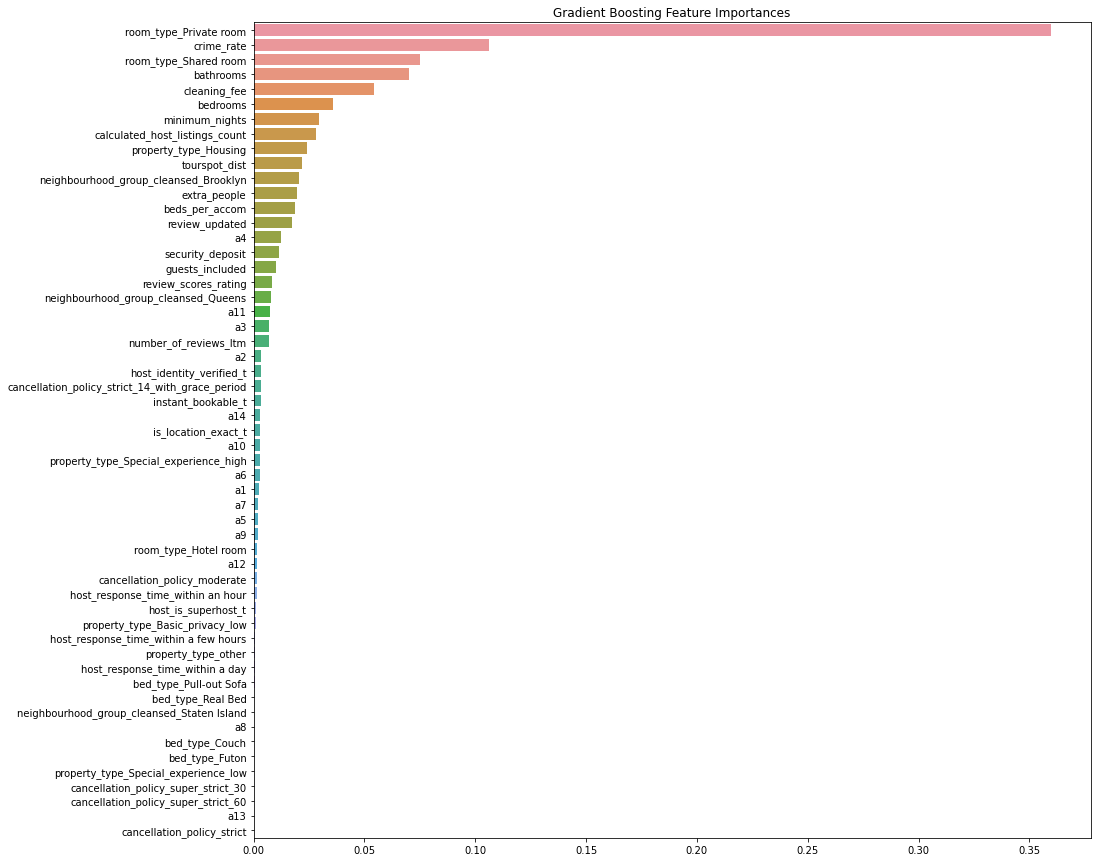

In [215]:
gb_features = gb.feature_importances_
gb_feature_imp = pd.Series(gb_features, index=x_train_vif.columns)
gb_feature_imp = gb_feature_imp.sort_values(ascending=False)

plt.figure(figsize=(15,15))
plt.title('Gradient Boosting Feature Importances')
sns.barplot(x=gb_feature_imp, y = gb_feature_imp.index)
plt.show()

## XGBoost

In [ ]:
# 튜닝 전
xgb = XGBRegressor()
xgb.fit(x_train_vif, y_train_log)

xgb.fit(x_test_vif, y_test_log)

n = len(x_test_vif)
p = len(x_test_vif.columns)

# drop 'host_response_rate'
xgb_pred_test = xgb.predict(x_test_vif)
r2_xgb = xgb.score(x_test_vif, y_test_log)

#RMSE_test
mse_xgb_test = mean_squared_error(y_test, xgb_pred_test)
rmse_xgb_test = mse_xgb_test**(0.5)
#MAE_test
mae_xgb_test = mean_absolute_error(y_test_log, xgb_pred_test)
print('r-square', r2_xgb)
print('rmse', rmse_xgb_test)
print('mae', mae_xgb_test)

# adj=R^2
adj_r2_xgb = 1-((n-1)*(1-r2_xgb))/(n-p-1)
print('adj r2', adj_r2_xgb)

[17:59:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:59:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r-square 0.6389969704645371
rmse 389.7685258672932
mae 0.2924212787678141
adj r2 0.6383480027696702


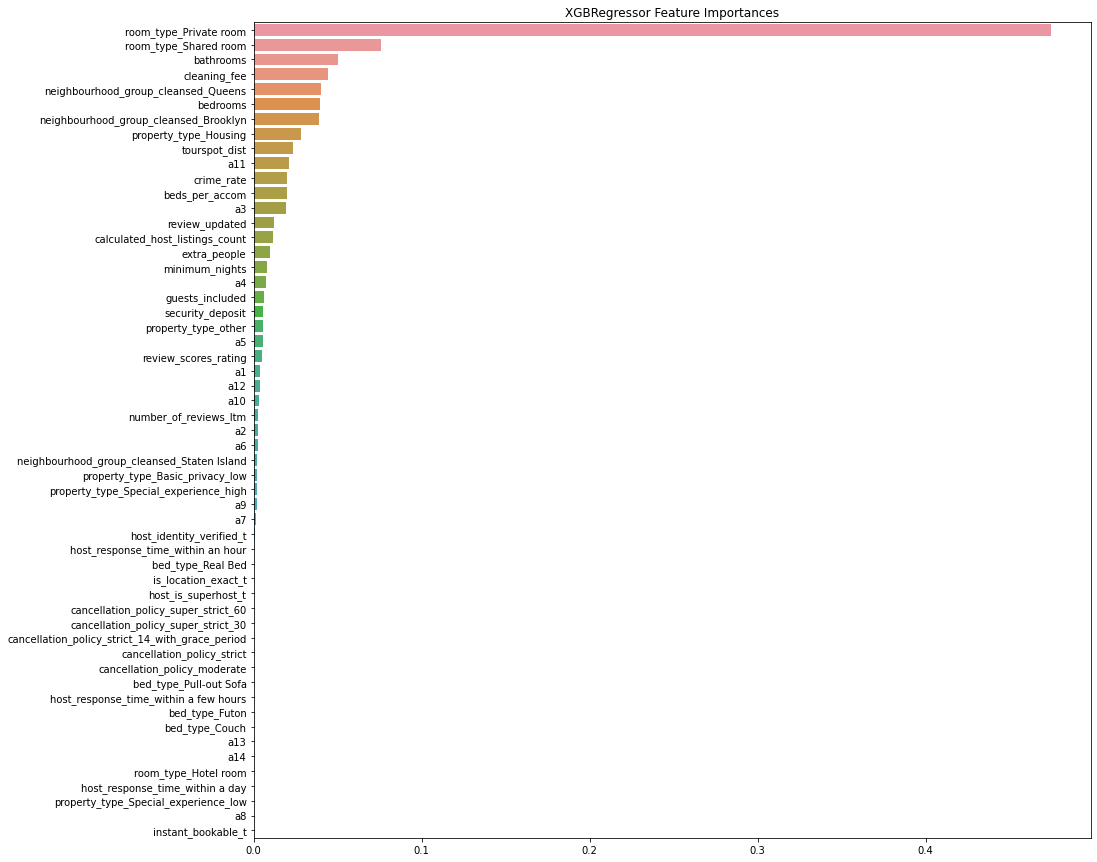

In [ ]:
xgb_f = xgb.feature_importances_
xgb_f_i = pd.Series(xgb_f, index=x_train_vif.columns)
xgb_f_i = xgb_f_i.sort_values(ascending=False)

plt.figure(figsize=(15,15))
plt.title('XGBRegressor Feature Importances')
sns.barplot(x=xgb_f_i, y = xgb_f_i.index)
plt.show()

In [ ]:
# 사용한 하이퍼 파라미터
# 하이퍼 파라미터 조정
params = {
    'n_estimators': [500, 1000], 
    'learning_rate': [0.1, 0.05, 0.01], 
    'max_depth': [7, 8], 
    'colsample_bytree': [0.8, 0.9], 
    'subsample': [0.8, 0.9,]
}

clf = RandomizedSearchCV(XGBRegressor(), params, random_state=1234, cv=3, n_iter=2, scoring='neg_mean_squared_error')
clf.fit(x_train_vif, y_train_log)
clf.best_score_

[18:02:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:05:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:07:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:13:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:18:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:23:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


-0.12484341365459056

In [ ]:
clf.best_score_

-0.12484341365459056

In [ ]:
clf.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 7,
 'n_estimators': 500,
 'subsample': 0.8}

In [ ]:
# 튜닝 후
xgb.fit(x_train_vif, y_train_log)
xgb = XGBRegressor(n_estimators=500, colsample_bytree=0.8, min_child_weight=5, max_depth=7, learning_rate=0.05, 
                               n_jobs=-1, subsample=0.8, random_state= 1234, objective = 'reg:squarederror')
xgb.fit(x_test_vif, y_test_log)

# drop 'host_response_rate'
xgb_pred_test = xgb.predict(x_test_vif)
r2_xgb = xgb.score(x_test_vif, y_test_log)

#RMSE_test
mse_xgb_test = mean_squared_error(y_test_log, xgb_pred_test)
rmse_xgb_test = mse_xgb_test**(0.5)
#MAE_test
mae_xgb_test = mean_absolute_error(y_test_log, xgb_pred_test)
print('r-square', r2_xgb)
print('rmse', rmse_xgb_test)
print('mae', mae_xgb_test)

# adj=R^2
adj_r2_xgb = 1-((n-1)*(1-r2_xgb))/(n-p-1)
print('adj r2', adj_r2_xgb)

r-square 0.8322655177071605
rmse 0.2921285608625472
mae 0.20269652342618044
adj r2 0.8319639848904876


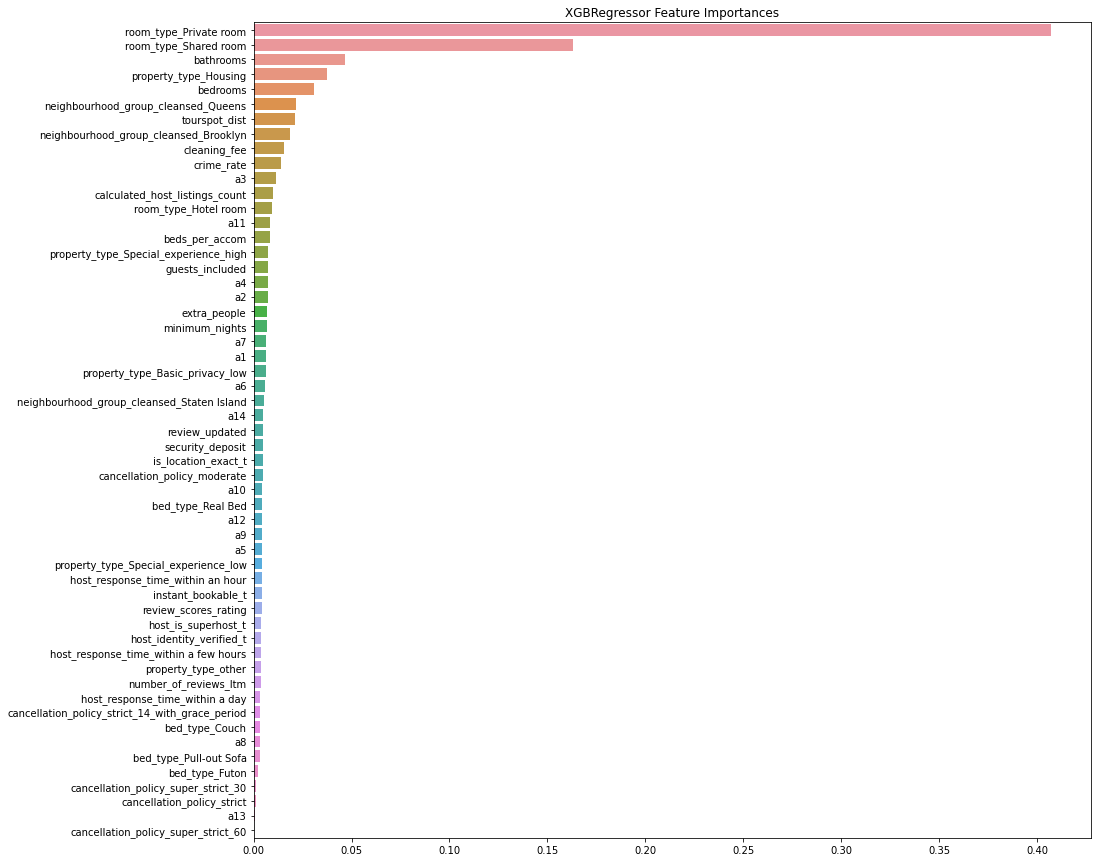

In [ ]:
xgb_f = xgb.feature_importances_
xgb_f_i = pd.Series(xgb_f, index=x_train_vif.columns)
xgb_f_i = xgb_f_i.sort_values(ascending=False)

plt.figure(figsize=(15,15))
plt.title('XGBRegressor Feature Importances')
sns.barplot(x=xgb_f_i, y = xgb_f_i.index)
plt.show()

**XGB는 y_log하니깐 결과값이 더 안좋아졌음.**